In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# Librairies scientifiques
import pandas as pd
import numpy as np

# Affichage
from IPython.display import display

# Librairies graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# Librairies de traitement de texte
from nltk import Counter
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup
import re

from datetime import datetime

# Récupération de la données

In [3]:
# on récupère l'ensemble des données
post_set1 = pd.read_csv("QueryResults1.csv")
post_set2 = pd.read_csv("QueryResults2.csv")
post_set3 = pd.read_csv("QueryResults3.csv")
post_set4 = pd.read_csv("QueryResults4.csv")
post_set5 = pd.read_csv("QueryResults5.csv")
post_set6 = pd.read_csv("QueryResults6.csv")
post_set7 = pd.read_csv("QueryResults7.csv")

# on construit le dataframe complet afin de conserver 50 000 échantillons non nuls
df = pd.concat([post_set1,post_set2,post_set3,post_set4,post_set5, post_set6, post_set7], ignore_index=True)
df_clean = df.loc[:, ['Title', 'Body', 'Tags']]
df_clean.reset_index(drop=True, inplace=True)
df_clean = df_clean.head(50000)

df_clean.sample(10)

Title  \
32752        view values of variables from oracle PL/SQL   
1102   What is good server performance monitoring sof...   
19475                           Handling large databases   
13125             Inner join across multiple access db's   
23972  How do I change the background color with Java...   
11897  Is there a way to debug Velocity templates in ...   
38864  ASP.NET Ajax Error: Sys.WebForms.PageRequestMa...   
2703   How to "unversion" a file in either svn and/or...   
23382  How can I prevent floats and doubles from gett...   
30555      Color regex matches - without dropping misses   

                                                    Body  \
32752  <p>I'm running a PL/SQL block that is supposed...   
1102   <p>I'm looking for some software to monitor a ...   
19475  <p>I have been working in a web project(asp.ne...   
13125  <p>I am re-designing an application for a ASP....   
23972  <p>Anyone know a simple method to swap the bac...   
11897  <p>We make heavy use of Velocity in our web ap...   
38864  <p>My website has been giving me intermittent ...   
2703   <p>It happens to me all the time. I accidental...   
23382  <p>When I give Java and C large floats and dou...   
30555  <p>When using <code>grep --color=always</code>...   

                                                    Tags  
32752                                    <oracle><plsql>  
1102                    <windows><performance><sysadmin>  
19475  <sql-server><database><performance><database-d...  
13125                   <asp.net><ms-access><inner-join>  
23972                                  <javascript><css>  
11897              <debugging><templates><velocity><vtl>  
38864  <javascript><asp.net><.net><exception-handling...  
2703             <svn><git><version-control><versioning>  
23382                          <java><c><floating-point>  
30555                                     <regex><linux>

In [4]:
n = 200
df_clean.Title.iloc[n]

'How to RedirectToAction in ASP.NET MVC without losing request data'

In [5]:
df_clean.Body.iloc[n]

'<p>Using ASP.NET MVC there are situations (such as form submission) that may require a <code>RedirectToAction</code>.  </p>\n\n<p>One such situation is when you encounter validation errors after a form submission and need to redirect back to the form, but would like the URL to reflect the URL of the form, not the action page it submits to.</p>\n\n<p>As I require the form to contain the originally <code>POST</code>ed data, for user convenience, as well as validation purposes, how can I pass the data through the <code>RedirectToAction()</code>?  If I use the viewData parameter, my <code>POST</code> parameters will be changed to <code>GET</code> parameters.</p>\n'

In [6]:
df_clean.Tags.iloc[n]

'<c#><asp.net-mvc>'

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50000 non-null  object
 1   Body    50000 non-null  object
 2   Tags    50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


# Analyse

## Fonctions de pre-processing

Avant de tokenizer les différentes features, on procède à une première opération en supprimant la ponctuation
et en réduisant la casse.
On va également conserver la racine de chaque mot par lemmatisation.

Voici les fonctions que nous utiliserons en pre-processing:

In [8]:
def pre_tokenize(text):
    """ Permet de supprimer la ponctuation et lowercase """
    
    # Les ponctuations à supprimer
    expr = ["?", ",", ".", "'", ";", ":", "!", "\n", "(", ")", "|", "_", "-", "`", "-", "*", "\""]
    for char in expr:
        text = text.replace(char, ' ')
    # Réduire la casse   
    text = str(np.char.lower(text))
    
    return text

In [9]:
def lemmatize_text(text):
    """ Permet de retirer prefixe et suffixe pour retenir la racine du mot """

    lem = WordNetLemmatizer()
    text_lemmatized = []
    words = word_tokenize(text)
    for word in words:
        word = lem.lemmatize(word, "n")
        word = lem.lemmatize(word, "v")
        text_lemmatized.append(word)
    #text = ' '.join(text_lemmatized)
    
    return text_lemmatized

## La feature Title

On s'intéresse d'abbord à la variable Title.

In [10]:
df_clean.Title.head()

0          How to convert a Decimal to a Double in C#?
1    Why did the width collapse in the percentage w...
2    How do I calculate someone's age based on a Da...
3                        Calculate relative time in C#
4                          Determine a user's timezone
Name: Title, dtype: object

On procède à un nettoyage à l'aide de nos fonctions de pre-processing.

In [11]:
df_title = df_clean.Title.copy()

# On retire la ponctuation et on réduit la casse
df_title = df_title.map(pre_tokenize)

# On retire les caractères n'étant pas des lettres
df_title = df_title.map(lambda x: re.sub("[^a-zA-Z]", " ", x))

# On garde la racine des mots complexes
df_title = df_title.map(lemmatize_text)

df_title.head()

0    [how, to, convert, a, decimal, to, a, double, ...
1    [why, do, the, width, collapse, in, the, perce...
2    [how, do, i, calculate, someone, s, age, base,...
3                   [calculate, relative, time, in, c]
4                    [determine, a, user, s, timezone]
Name: Title, dtype: object

On a maintenant une liste de mot nettoyée pour chaque titre de post.

/Users/valentindeshayes/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


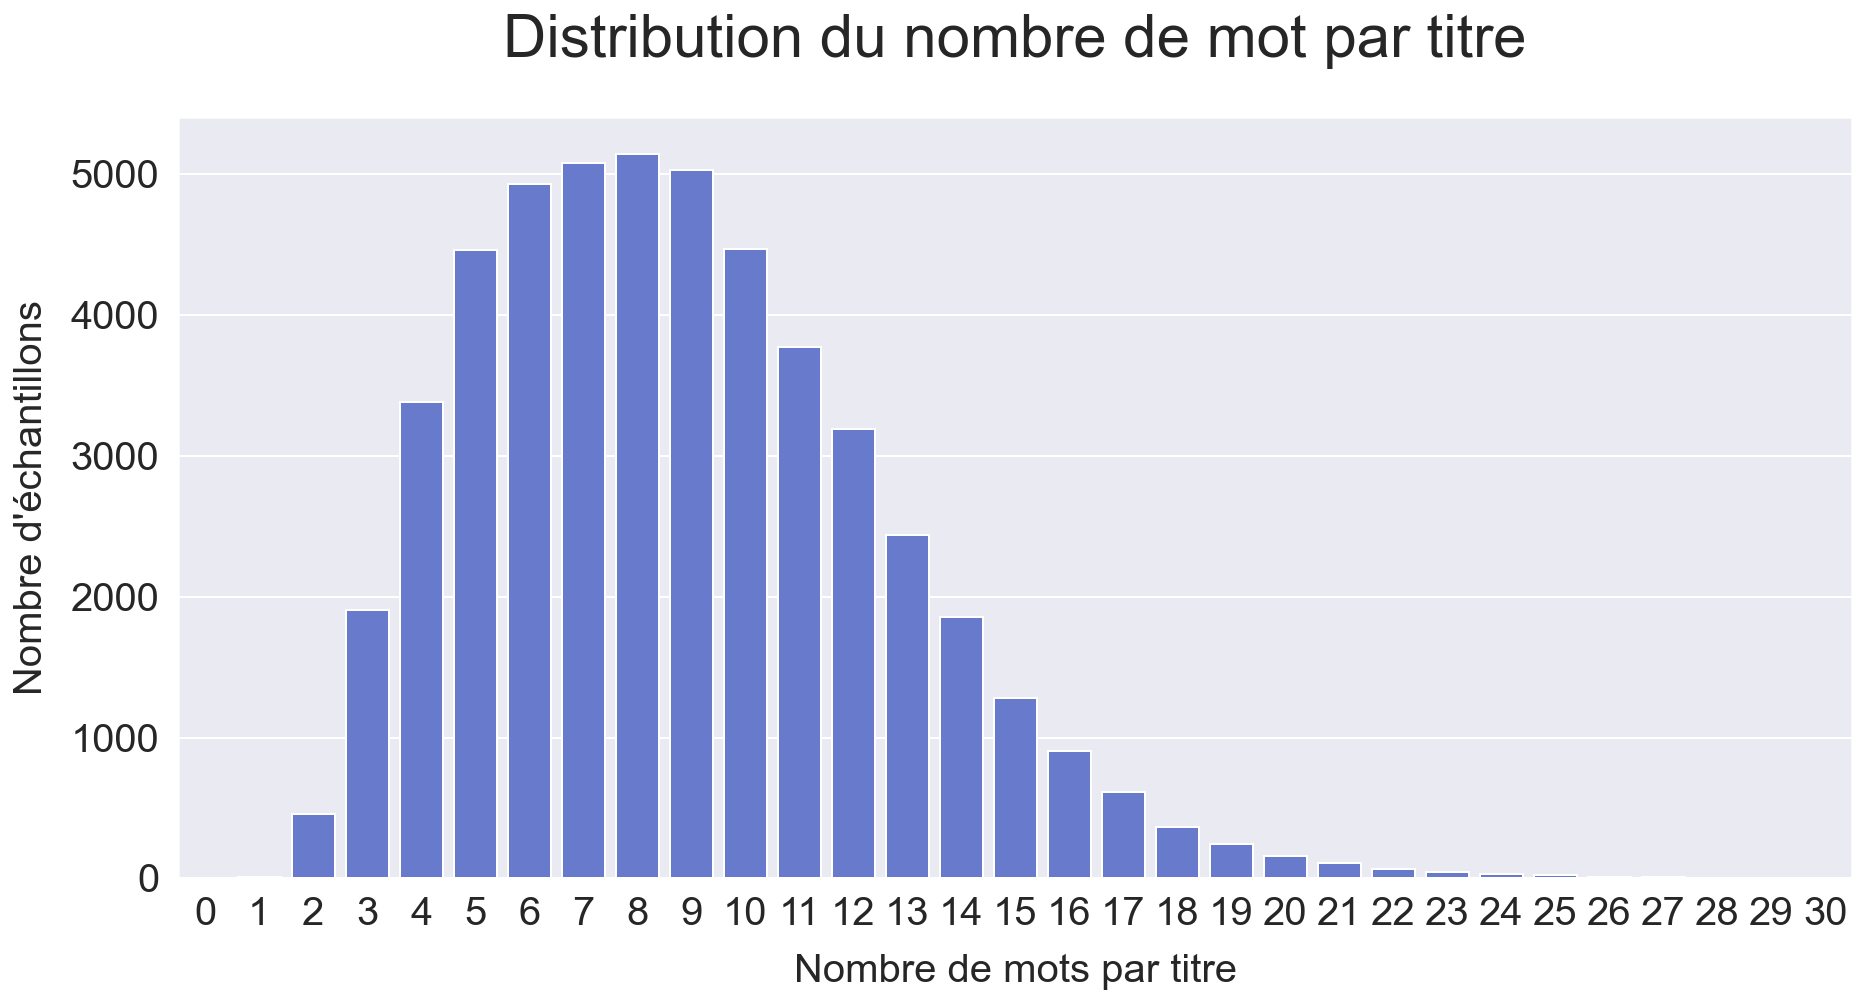

In [12]:
sns.set()
colors = sns.color_palette("hls", 8)
plt.figure(figsize=(15,7))
sns.countplot(df_title.map(lambda x: len(x)), color=colors[5])
plt.title("Distribution du nombre de mot par titre", fontsize=30, pad=30)
plt.xlabel("Nombre de mots par titre", fontsize=20, labelpad=10)
plt.ylabel("Nombre d'échantillons", fontsize=20, labelpad=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

On souhaite retirer les stopwords qui n'apporte pas d'informations et alourdissent le jeu de données.

In [13]:
# On créer une liste de tout les mots contenus dans les titres
words_title = []
for title in df_title:
    words_title.extend(title)
    
words_title[:10]

['how', 'to', 'convert', 'a', 'decimal', 'to', 'a', 'double', 'in', 'c']

In [14]:
# On récupère la liste des mots uniques ainsi que leur fréquence d'apparition dans les titres
unique, count = np.unique(words_title, return_counts=True)

/Users/valentindeshayes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


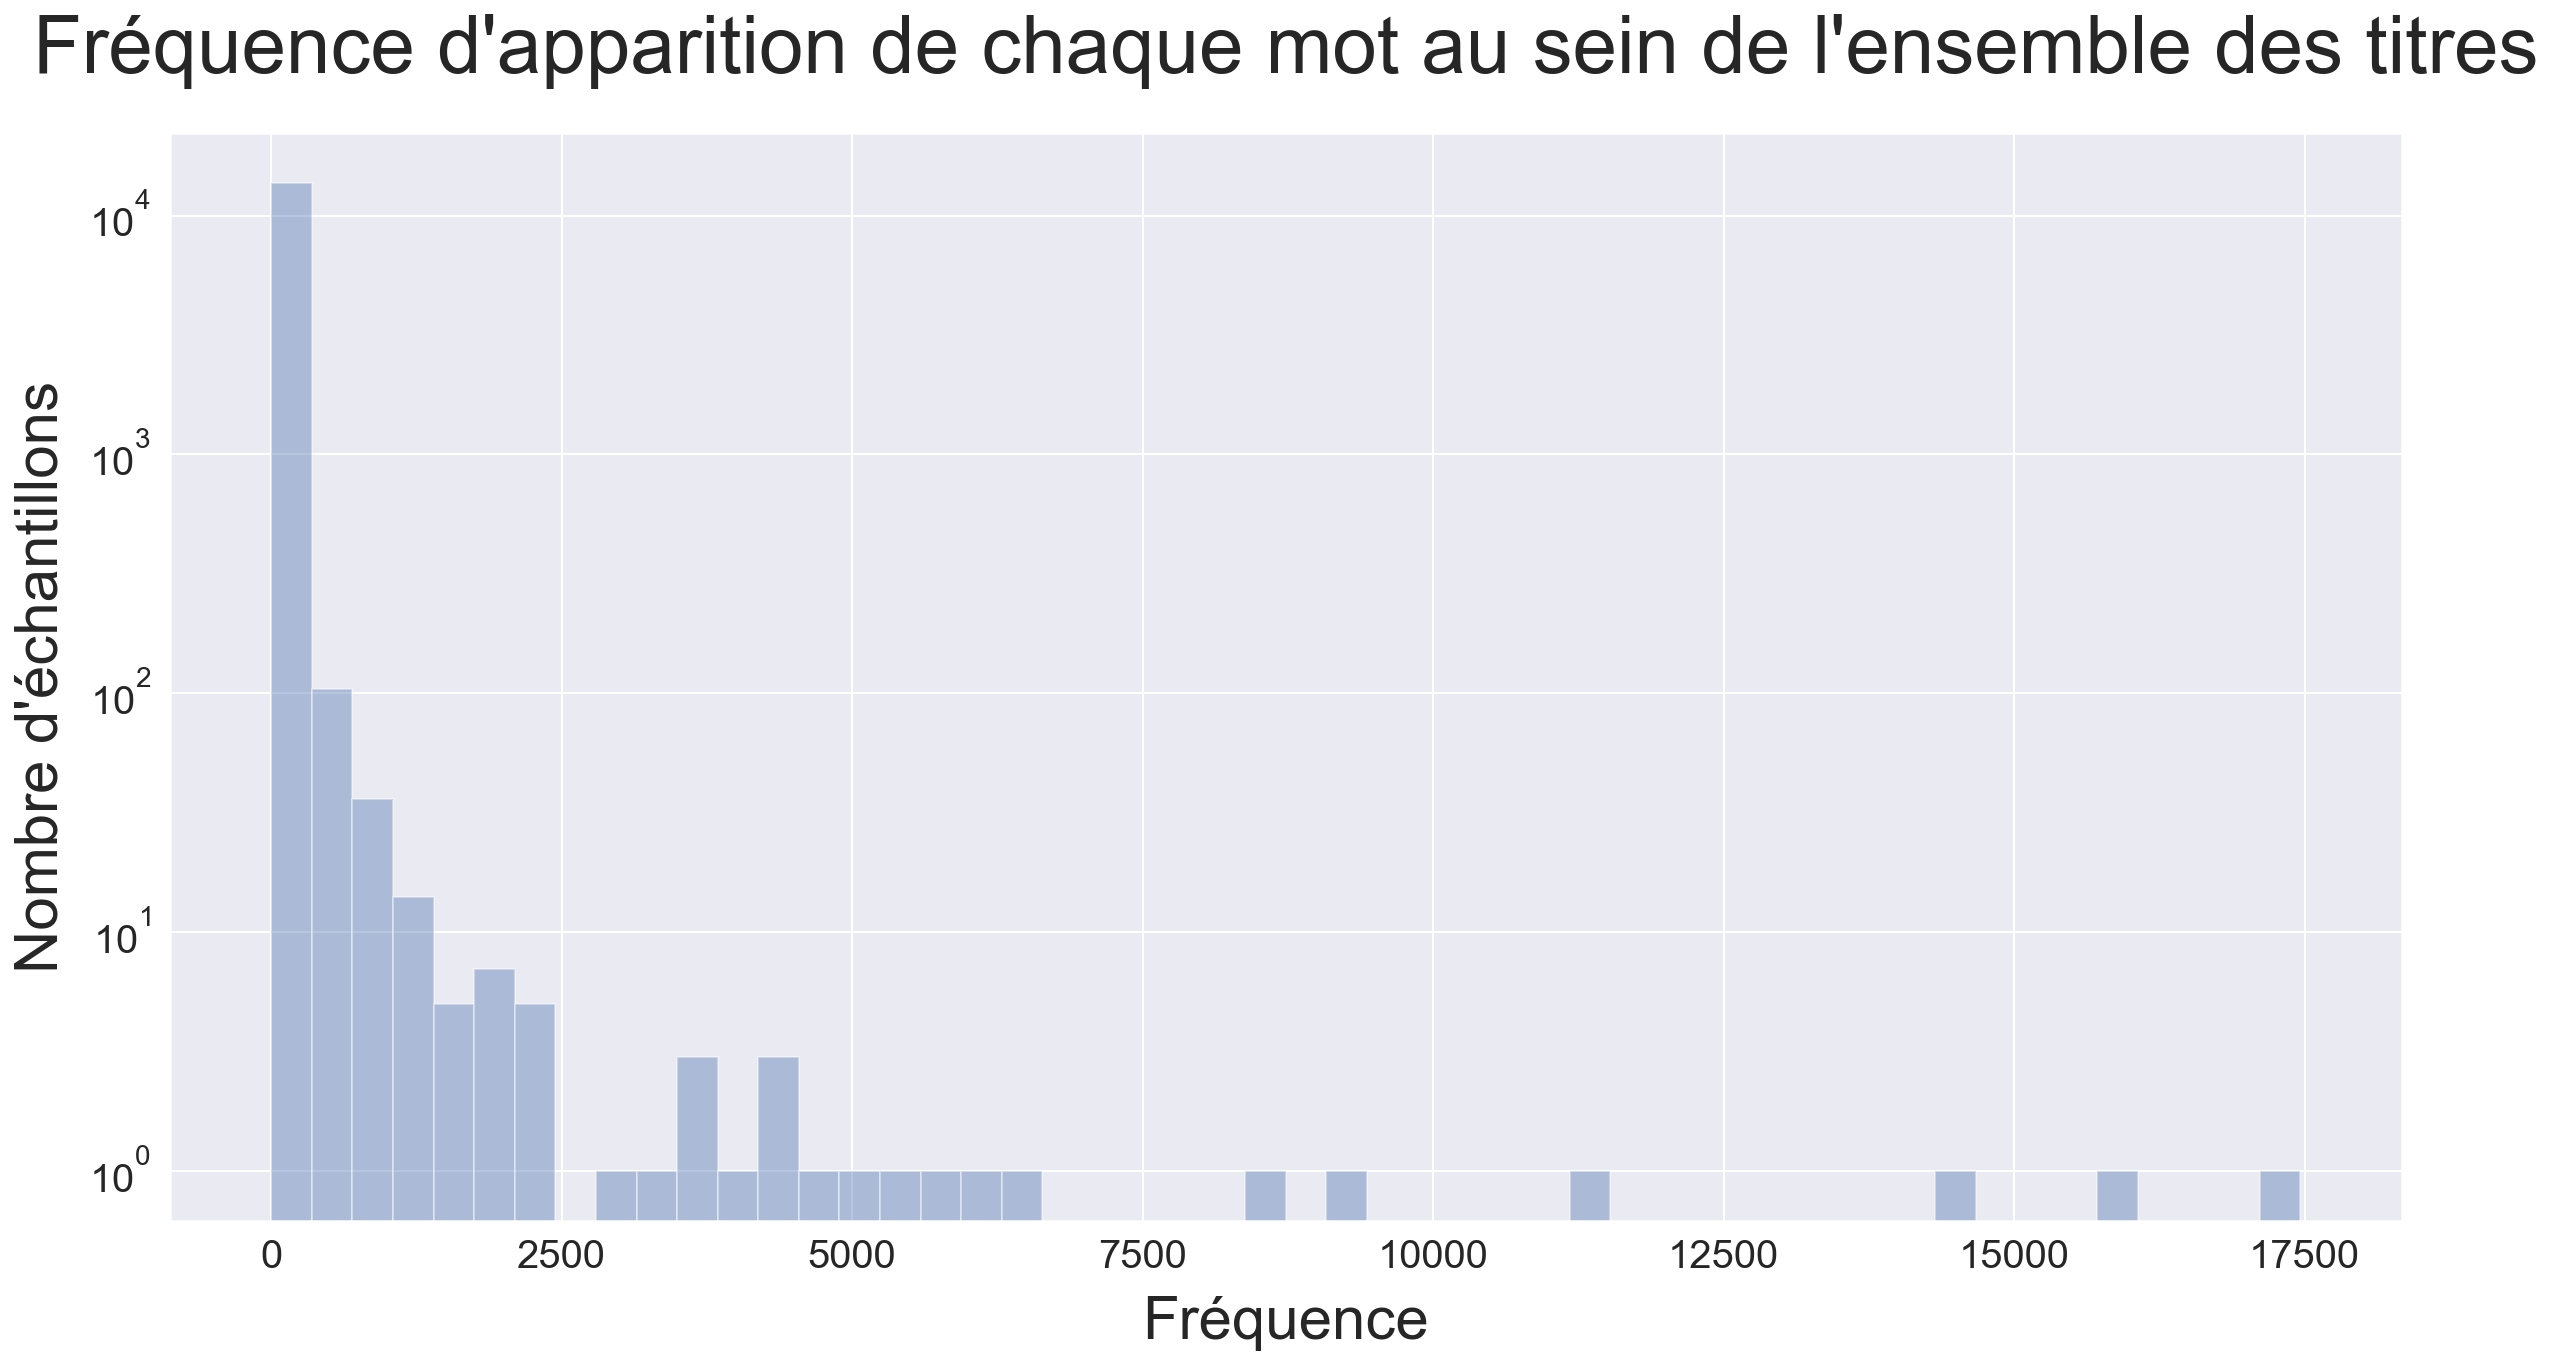

In [15]:
sns.set()
plt.figure(figsize=(20,10))
sns.distplot(count, kde=False)
plt.title("Fréquence d'apparition de chaque mot au sein de l'ensemble des titres", fontsize=40, pad=30)
plt.xlabel("Fréquence", fontsize=30, labelpad=10)
plt.ylabel("Nombre d'échantillons", fontsize=30, labelpad=10)
plt.yscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

On observe deux valeurs extrêmes :
- un nombre de mots très important présentent une unique occurence, peu exploitable et alourdi le jeu de donnée
- un certain nombre de mots possèdent de très nombreuses occurences, probablement les stop words

In [16]:
title_occ = pd.Series(index=unique, data=count)

print("Exemples de mots présentant de très nombreuses occurences :")
display(title_occ[title_occ > 12500])
print("\n")
print("Exemples de mots présentant une unique occurence :")
display(title_occ[title_occ == 1].sample(5))

Exemples de mots présentant de très nombreuses occurences :


a     17464
in    14491
to    15939
dtype: int64



Exemples de mots présentant une unique occurence :


documnet       1
shellscript    1
systematic     1
hrefs          1
profession     1
dtype: int64

## La feature Body

In [17]:
df_clean.Body.head()

0    <p>I want to use a <code>Track-Bar</code> to c...
1    <p>I have an absolutely positioned <code>div</...
2    <p>Given a <code>DateTime</code> representing ...
3    <p>Given a specific <code>DateTime</code> valu...
4    <p>Is there a standard way for a web server to...
Name: Body, dtype: object

Regardons de plus près un échantillon

In [18]:
n = 500
df_clean.Body.iloc[n]

'<p>I am trying to lay out a table-like page with two columns.  I want the rightmost column to dock to the right of the page, and this column should have a distinct background color.  The content in the right side is almost always going to be smaller than that on the left.  I would like the div on the right to always be tall enough to reach the separator for the row below it.  How can I make my background color fill that space?</p>\n\n<p><div class="snippet" data-lang="js" data-hide="false" data-console="true" data-babel="false">\r\n<div class="snippet-code">\r\n<pre class="snippet-code-css lang-css prettyprint-override"><code>.rightfloat {\r\n  color: red;\r\n  background-color: #BBBBBB;\r\n  float: right;\r\n  width: 200px;\r\n}\r\n\r\n.left {\r\n  font-size: 20pt;\r\n}\r\n\r\n.separator {\r\n  clear: both;\r\n  width: 100%;\r\n  border-top: 1px solid black;\r\n}</code></pre>\r\n<pre class="snippet-code-html lang-html prettyprint-override"><code>&lt;div class="separator"&gt;\r\n  &lt

On observe qu'en plus des balises html propres à chaque post, il y a souvent de nombreux morceaux de code peu intéressant pour notre étude.
On décide donc de ne conserver que le texte se trouvant à l'intérieur des balises < p > et < /p >

In [19]:
def get_bs_text(raw_text):
    soup = BeautifulSoup(raw_text)
    divTag = soup.find_all("p")

    clean_text = ' '.join([elem.text for elem in divTag])
    return clean_text

In [20]:
get_bs_text(df_clean.Body.iloc[n])

'I am trying to lay out a table-like page with two columns.  I want the rightmost column to dock to the right of the page, and this column should have a distinct background color.  The content in the right side is almost always going to be smaller than that on the left.  I would like the div on the right to always be tall enough to reach the separator for the row below it.  How can I make my background color fill that space?  Edit:  I agree that this example is very table-like and an actual table would be a fine choice.  But my "real" page will eventually be less table-like, and I\'d just like to first master this task! Also, for some reason, when I create/edit my posts in IE7, the code shows up correctly in the preview view, but when I actually post the message, the formatting gets removed.  Editing my post in Firefox 2 seems to have worked, FWIW. Another edit: Yeah, I unaccepted GateKiller\'s answer.  It does indeed work nicely on my simple page, but not in my actual heavier page.  I

On procède à un nettoyage à l'aide de nos fonctions de pre-processing.

In [21]:
df_body = df_clean.Body.copy()

# On parse le texte pour retirer les balises html et conserver le texte
df_body = df_body.map(lambda text: get_bs_text(text))

# On retire les caractères n'étant pas des lettres
df_body = df_body.map(lambda x: re.sub("[^a-zA-Z]", " ", x))

# On retire la ponctuation et on réduit la casse
df_body = df_body.map(pre_tokenize)

# On garde la racine des mots complexes
df_body = df_body.map(lemmatize_text)

df_body.head()

0    [i, want, to, use, a, track, bar, to, change, ...
1    [i, have, an, absolutely, position, div, conta...
2    [give, a, datetime, represent, a, person, s, b...
3    [give, a, specific, datetime, value, how, do, ...
4    [be, there, a, standard, way, for, a, web, ser...
Name: Body, dtype: object

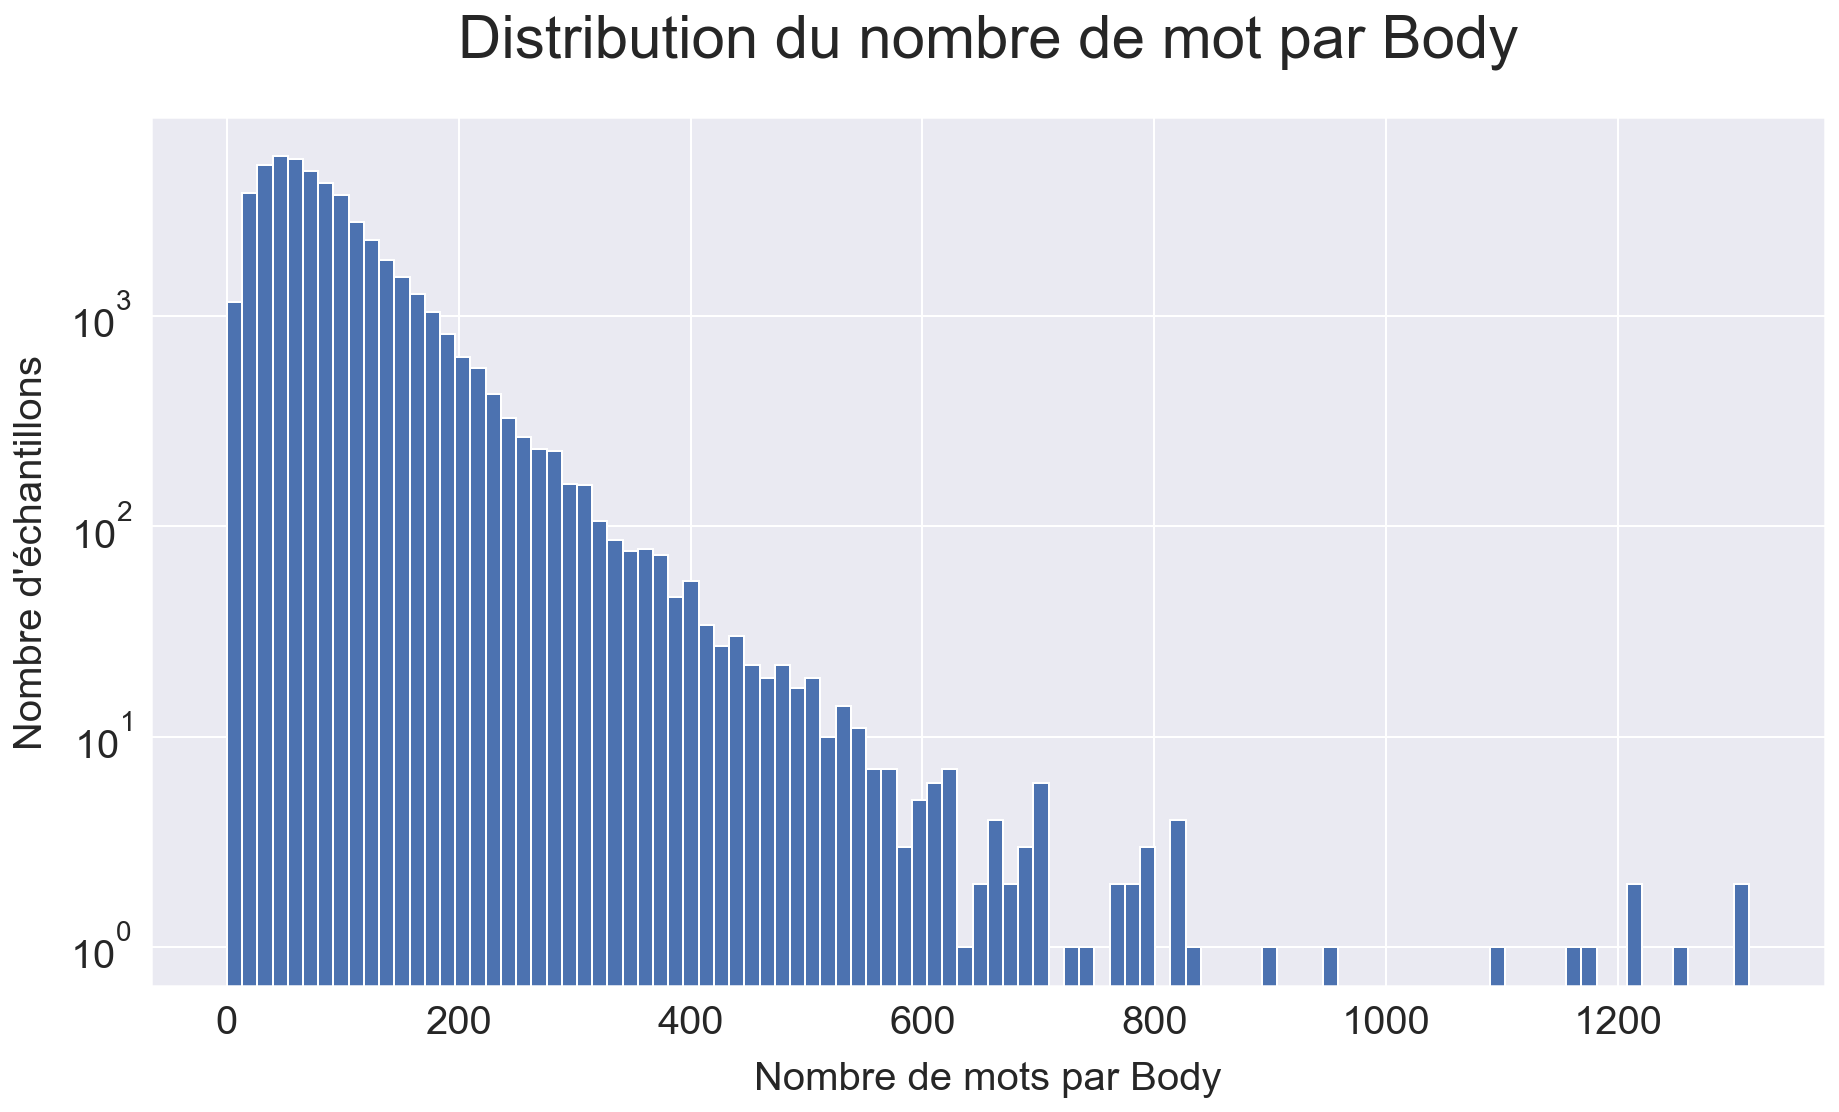

In [22]:
sns.set()
colors = sns.color_palette("hls", 8)
plt.figure(figsize=(15,8))
plt.hist(df_body.map(lambda x: len(x)), bins=100)
plt.title("Distribution du nombre de mot par Body", fontsize=30, pad=30)
plt.xlabel("Nombre de mots par Body", fontsize=20, labelpad=10)
plt.ylabel("Nombre d'échantillons", fontsize=20, labelpad=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
plt.show()

In [23]:
# On créer une liste de tout les mots contenus dans les bodys
words_body = []
for body in df_body:
    words_body.extend(body)
words_body[:10]

['i', 'want', 'to', 'use', 'a', 'track', 'bar', 'to', 'change', 'a']

In [24]:
# On récupère la liste des mots uniques ainsi que leur fréquence d'apparition dans les Body
body_occ = pd.Series(words_body).value_counts()

/Users/valentindeshayes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


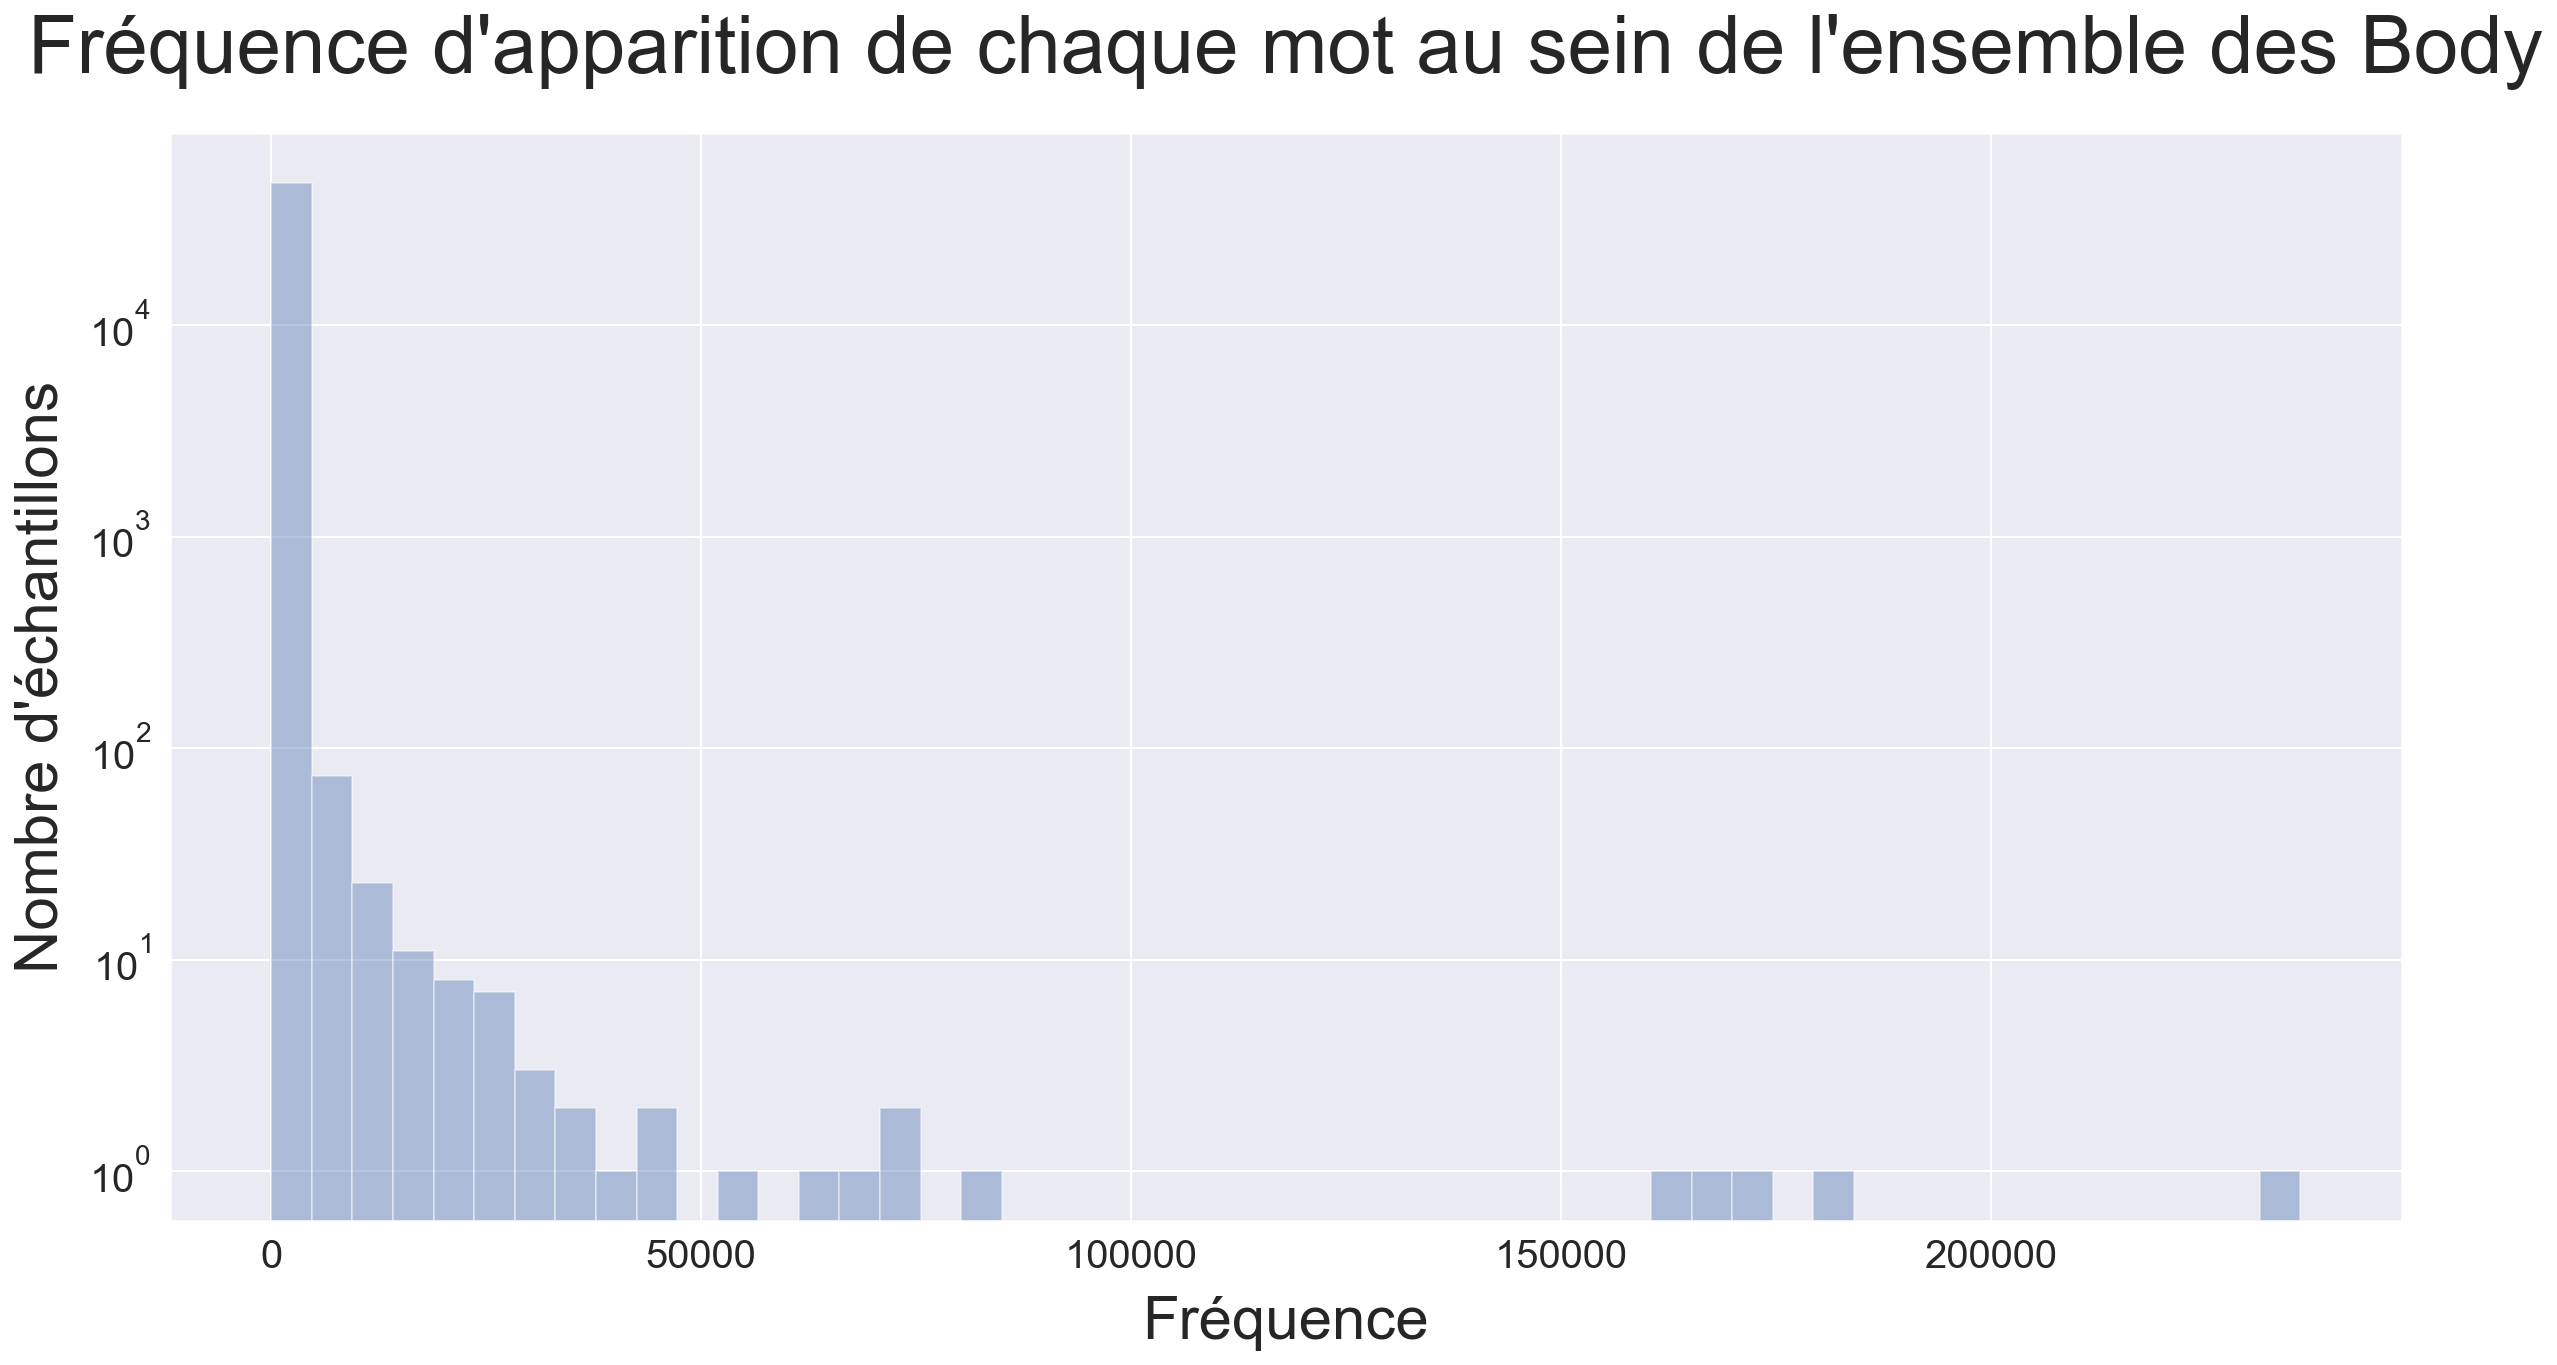

In [25]:
sns.set()
plt.figure(figsize=(20,10))
sns.distplot(body_occ.values, kde=False)
plt.title("Fréquence d'apparition de chaque mot au sein de l'ensemble des Body", fontsize=40, pad=30)
plt.xlabel("Fréquence", fontsize=30, labelpad=10)
plt.ylabel("Nombre d'échantillons", fontsize=30, labelpad=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
plt.show()

In [26]:
print("Exemples de mots présentant de très nombreuses occurences :")
display(body_occ[body_occ > 150000])
print("\n")
print("Exemples de mots présentant une unique occurence :")
display(body_occ[body_occ == 1].sample(5))

Exemples de mots présentant de très nombreuses occurences :


the    235990
i      182395
to     170677
be     166055
a      163211
dtype: int64



Exemples de mots présentant une unique occurence :


onselectindexchanged                      1
fileio                                    1
getboundszoomlevel                        1
ericdlarson                               1
addtrustedcodemoduleincurrentappdomain    1
dtype: int64

## La target Tags

In [27]:
df_clean.Tags.head()

0    <c#><floating-point><type-conversion><double><...
1                     <html><css><internet-explorer-7>
2                                 <c#><.net><datetime>
3    <c#><datetime><time><datediff><relative-time-s...
4    <html><browser><timezone><user-agent><timezone...
Name: Tags, dtype: object

In [28]:
df_tags = df_clean.Tags.copy()

# On retire les symboles < > entourant les tags afin de créer une liste de tags exploitable
df_tags = df_tags.map(lambda x: x[1:-1].split('><'))

df_tags.head()

0    [c#, floating-point, type-conversion, double, ...
1                     [html, css, internet-explorer-7]
2                                 [c#, .net, datetime]
3    [c#, datetime, time, datediff, relative-time-s...
4    [html, browser, timezone, user-agent, timezone...
Name: Tags, dtype: object

/Users/valentindeshayes/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


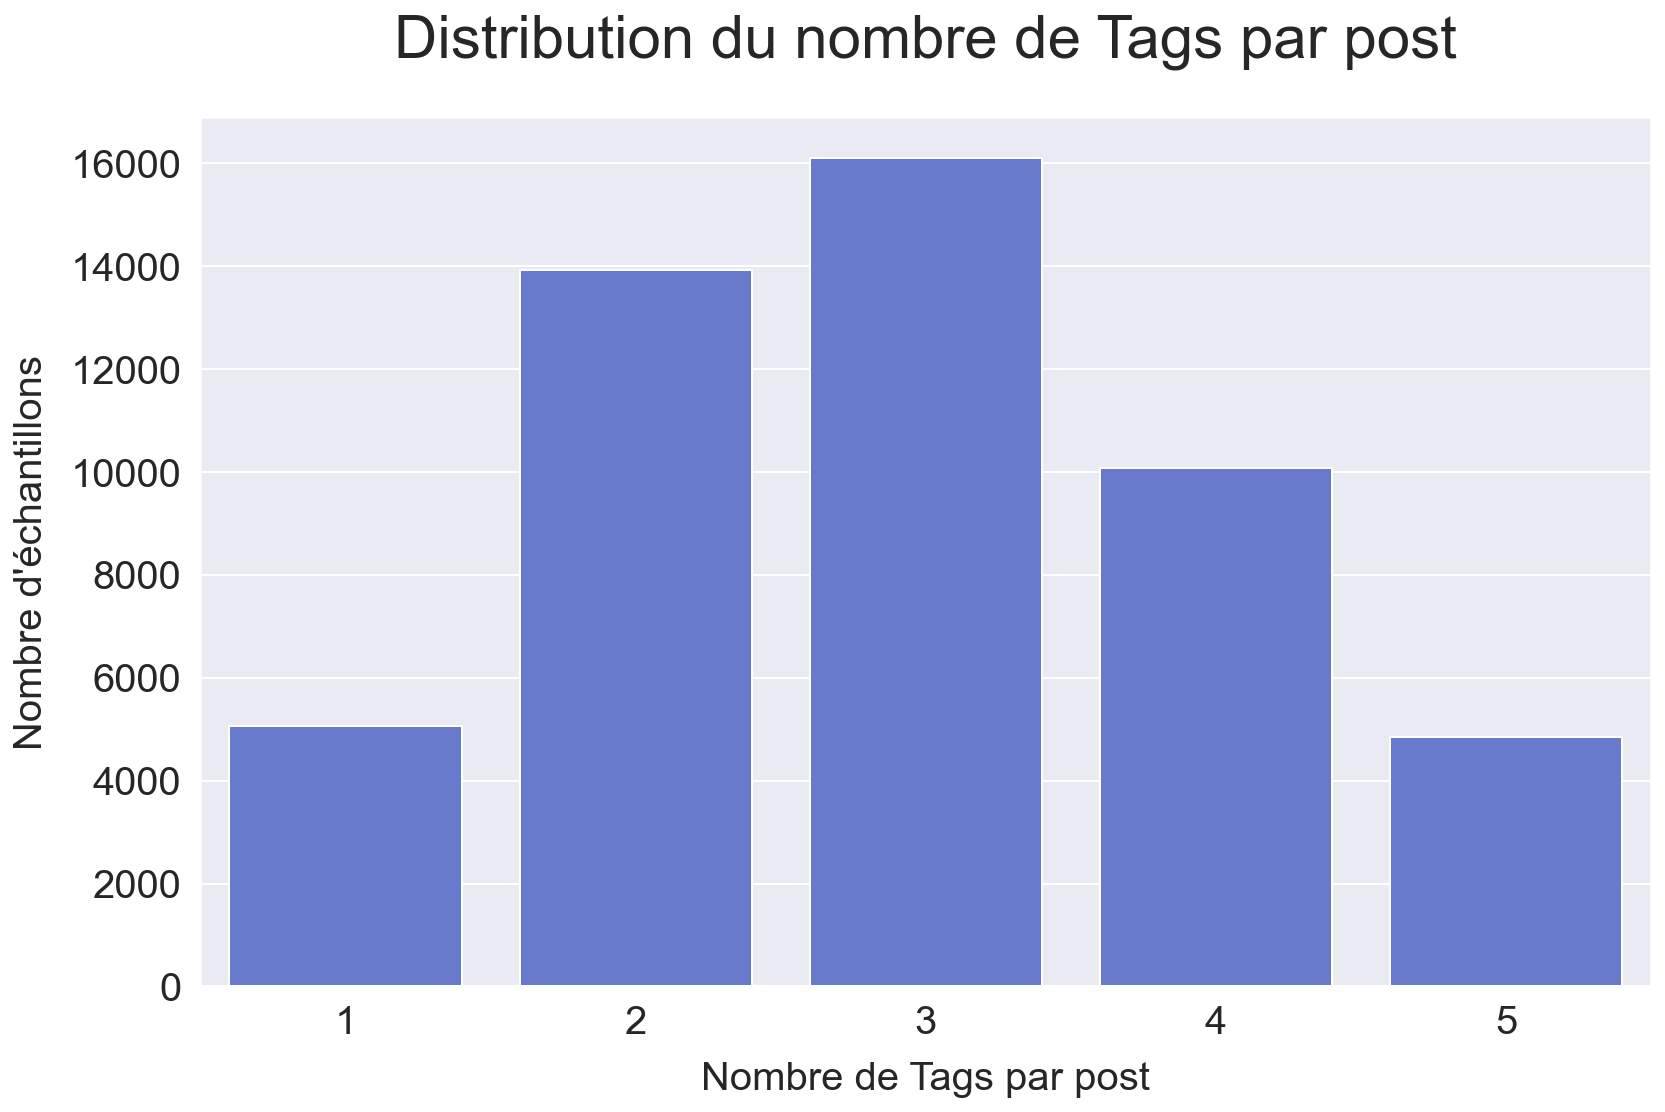

In [29]:
sns.set()
colors = sns.color_palette("hls", 8)
plt.figure(figsize=(13,8))
sns.countplot(df_tags.map(lambda x: len(x)), color=colors[5])
plt.title("Distribution du nombre de Tags par post", fontsize=30, pad=30)
plt.xlabel("Nombre de Tags par post", fontsize=20, labelpad=10)
plt.ylabel("Nombre d'échantillons", fontsize=20, labelpad=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [30]:
# On créer une liste de tout les mots contenus dans les tags
words_tags = []
for tags in df_tags:
    words_tags.extend(tags)
words_tags[:7]

['c#', 'floating-point', 'type-conversion', 'double', 'decimal', 'html', 'css']

In [31]:
# On récupère la liste des tags uniques ainsi que leur fréquence d'apparition
tags_occ = pd.Series(words_tags).value_counts()

/Users/valentindeshayes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


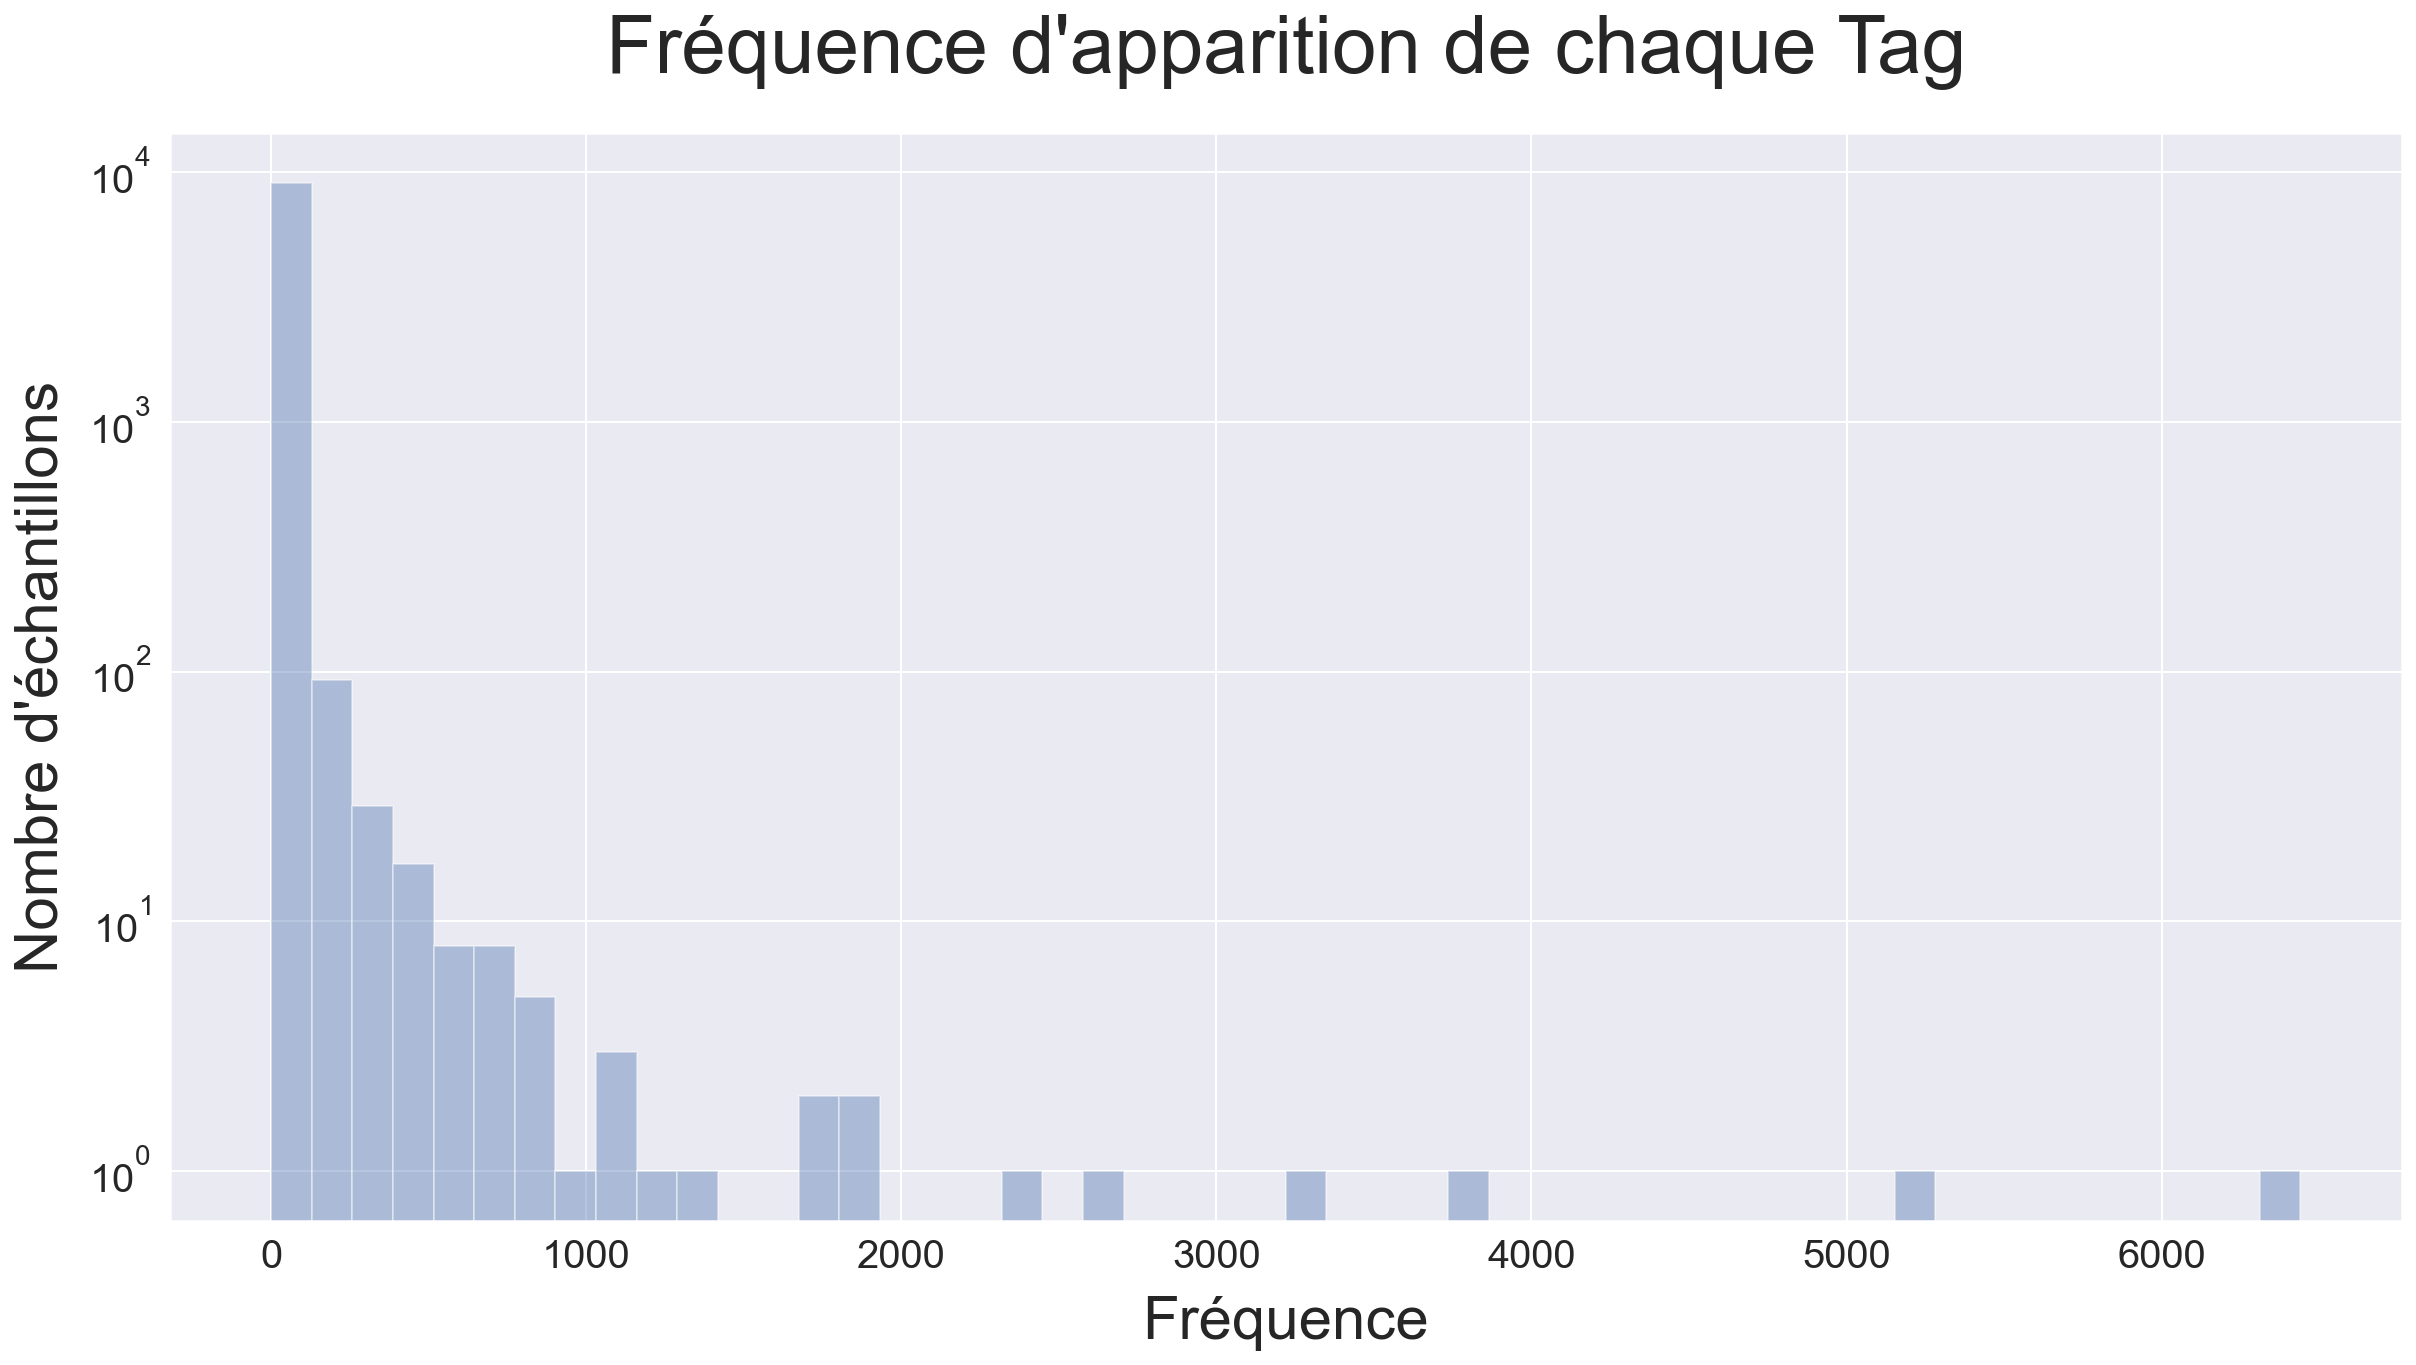

In [32]:
sns.set()
plt.figure(figsize=(20,10))
sns.distplot(tags_occ.values, kde=False)
plt.title("Fréquence d'apparition de chaque Tag", fontsize=40, pad=30)
plt.xlabel("Fréquence", fontsize=30, labelpad=10)
plt.ylabel("Nombre d'échantillons", fontsize=30, labelpad=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
plt.show()

In [33]:
print("Exemples de mots présentant de très nombreuses occurences :")
display(tags_occ[tags_occ > 5000])
print("\n")
print("Exemples de mots présentant une unique occurence :")
display(tags_occ[tags_occ == 1].sample(5))

Exemples de mots présentant de très nombreuses occurences :


c#      6440
.net    5170
dtype: int64



Exemples de mots présentant une unique occurence :


validationerror    1
lastinsertid       1
eeepc              1
adaptor            1
llvm               1
dtype: int64

# Préparation des ressources

## Création de la feature posts

On décide de créé une feature globale en entrée qui regroupe le titre et le body pour la
création de notre bag of words.

In [34]:
# On créé notre feature en entrée, un corpus composés du titre et du body pour chaque post
df_posts = df_title+df_body

In [35]:
# On créer une liste de tout les mots contenus dans les posts
words_posts = words_title + words_body
words_posts[:10]

['how', 'to', 'convert', 'a', 'decimal', 'to', 'a', 'double', 'in', 'c']

In [36]:
# On récupère la liste des tags uniques ainsi que leur fréquence d'apparition
posts_occ = pd.Series(words_posts).value_counts()

/Users/valentindeshayes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


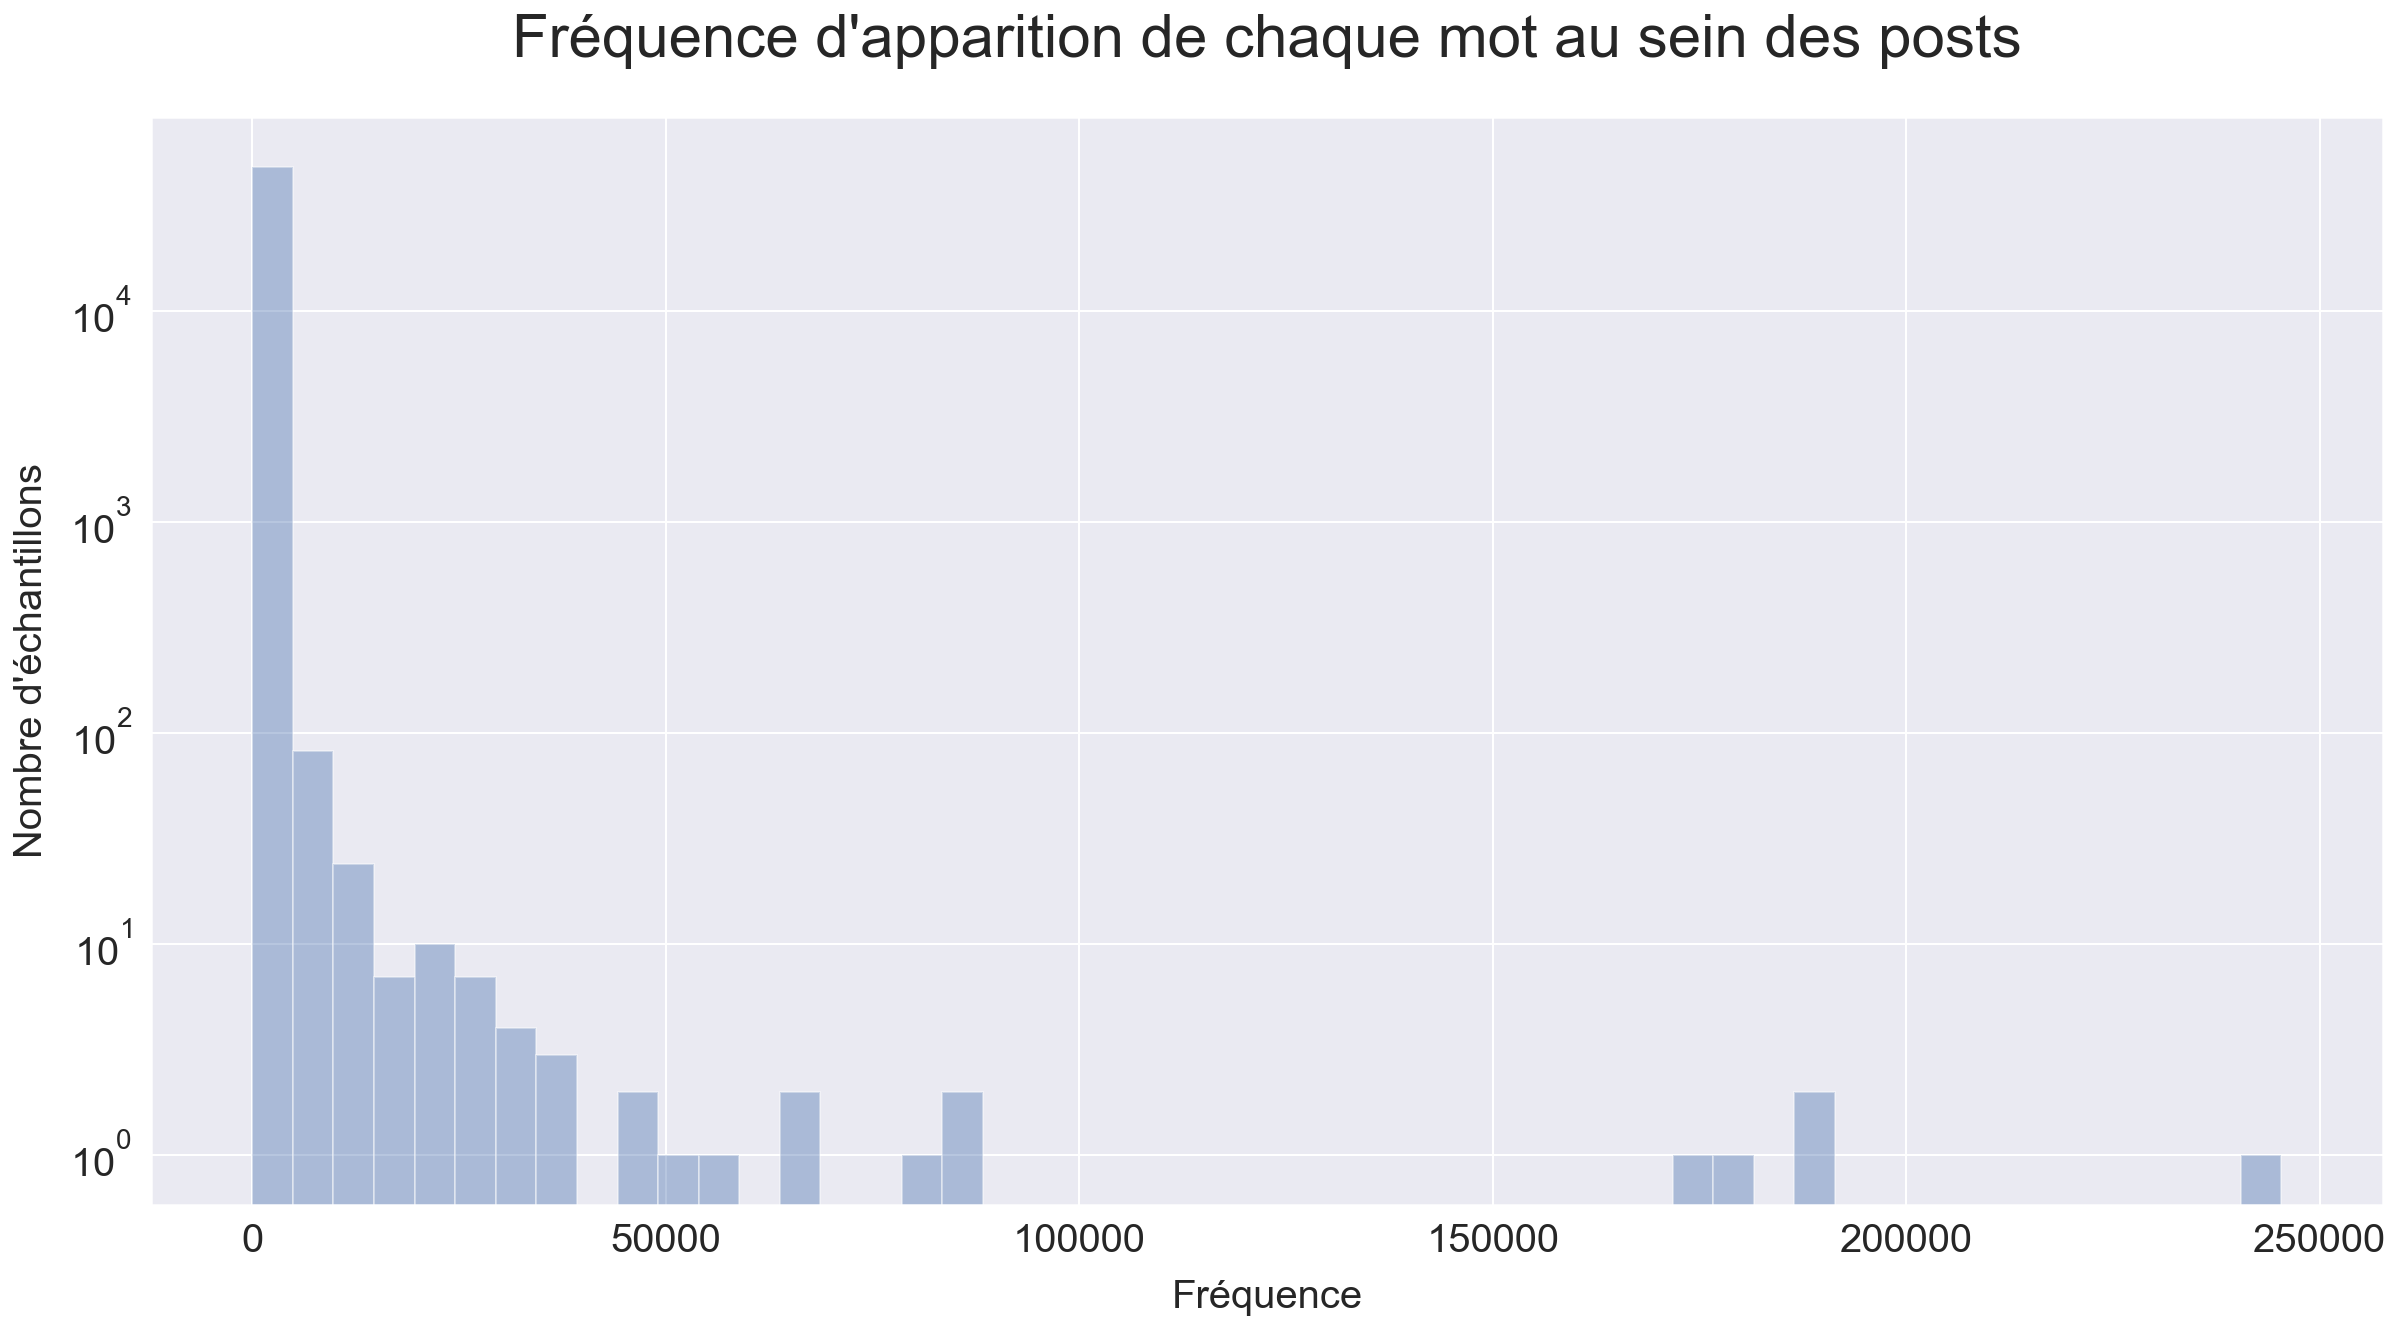

In [37]:
sns.set()
plt.figure(figsize=(20,10))
sns.distplot(posts_occ.values, kde=False)
plt.title("Fréquence d'apparition de chaque mot au sein des posts", fontsize=30, pad=30)
plt.xlabel("Fréquence", fontsize=20, labelpad=10)
plt.ylabel("Nombre d'échantillons", fontsize=20, labelpad=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
plt.show()

In [38]:
print("Exemples de mots présentant de très nombreuses occurences :")
display(posts_occ[posts_occ > 150000])
print("\n")
print("Exemples de mots présentant une unique occurence :")
display(posts_occ[posts_occ == 1].sample(5))

Exemples de mots présentant de très nombreuses occurences :


the    245356
i      188846
to     186616
a      180675
be     174442
dtype: int64



Exemples de mots présentant une unique occurence :


paraguay        1
linkers         1
multihreaded    1
reallybiglib    1
absract         1
dtype: int64

## Création du bag of words

Pour traiter ces extrêmes, il existe plusieurs solutions.
Nous pouvons utiliser des outils à notre disposition dans la bibliothèque nltk pour traiter les stopwords,
nous pouvons également retirer manuellement les mots ayant le plus et le moins d'occurences,
enfin nous pouvons utiliser une TF IDF pour créer notre bag of words.

In [39]:
# On créé la liste des mots à supprimer car trop commun
words_to_del_post = list(posts_occ.sort_values(ascending=False).index[:40])
words_to_del_post

['the',
 'i',
 'to',
 'a',
 'be',
 'in',
 'and',
 'of',
 'it',
 'that',
 'this',
 'for',
 'have',
 'use',
 'do',
 'on',
 'with',
 'can',
 'but',
 'how',
 'an',
 'my',
 'not',
 'what',
 'or',
 'there',
 't',
 'm',
 's',
 'if',
 'from',
 'like',
 'file',
 'you',
 'so',
 'get',
 'way',
 'would',
 'any',
 'work']

In [40]:
from nltk.corpus import stopwords

nb_words = []
for i in range(0, 401, 50):
    # On ajoute à la liste des mots à supprimer les mots présentant moins de i occurences
    words_few_occ_post = list(posts_occ[posts_occ < i].index)
    
    # On créé la liste globale des mots à retirer
    words_to_del_temp = words_to_del_post+words_few_occ_post
    
    clean_words_post = [word for word in list(posts_occ.index) if word not in words_to_del_temp]
    text = ' '.join(clean_words_post)
    text_tokens = word_tokenize(text)
    clean_words_post = [word for word in text_tokens if not word in stopwords.words()]
    
    nb_words.append(len(clean_words_post))

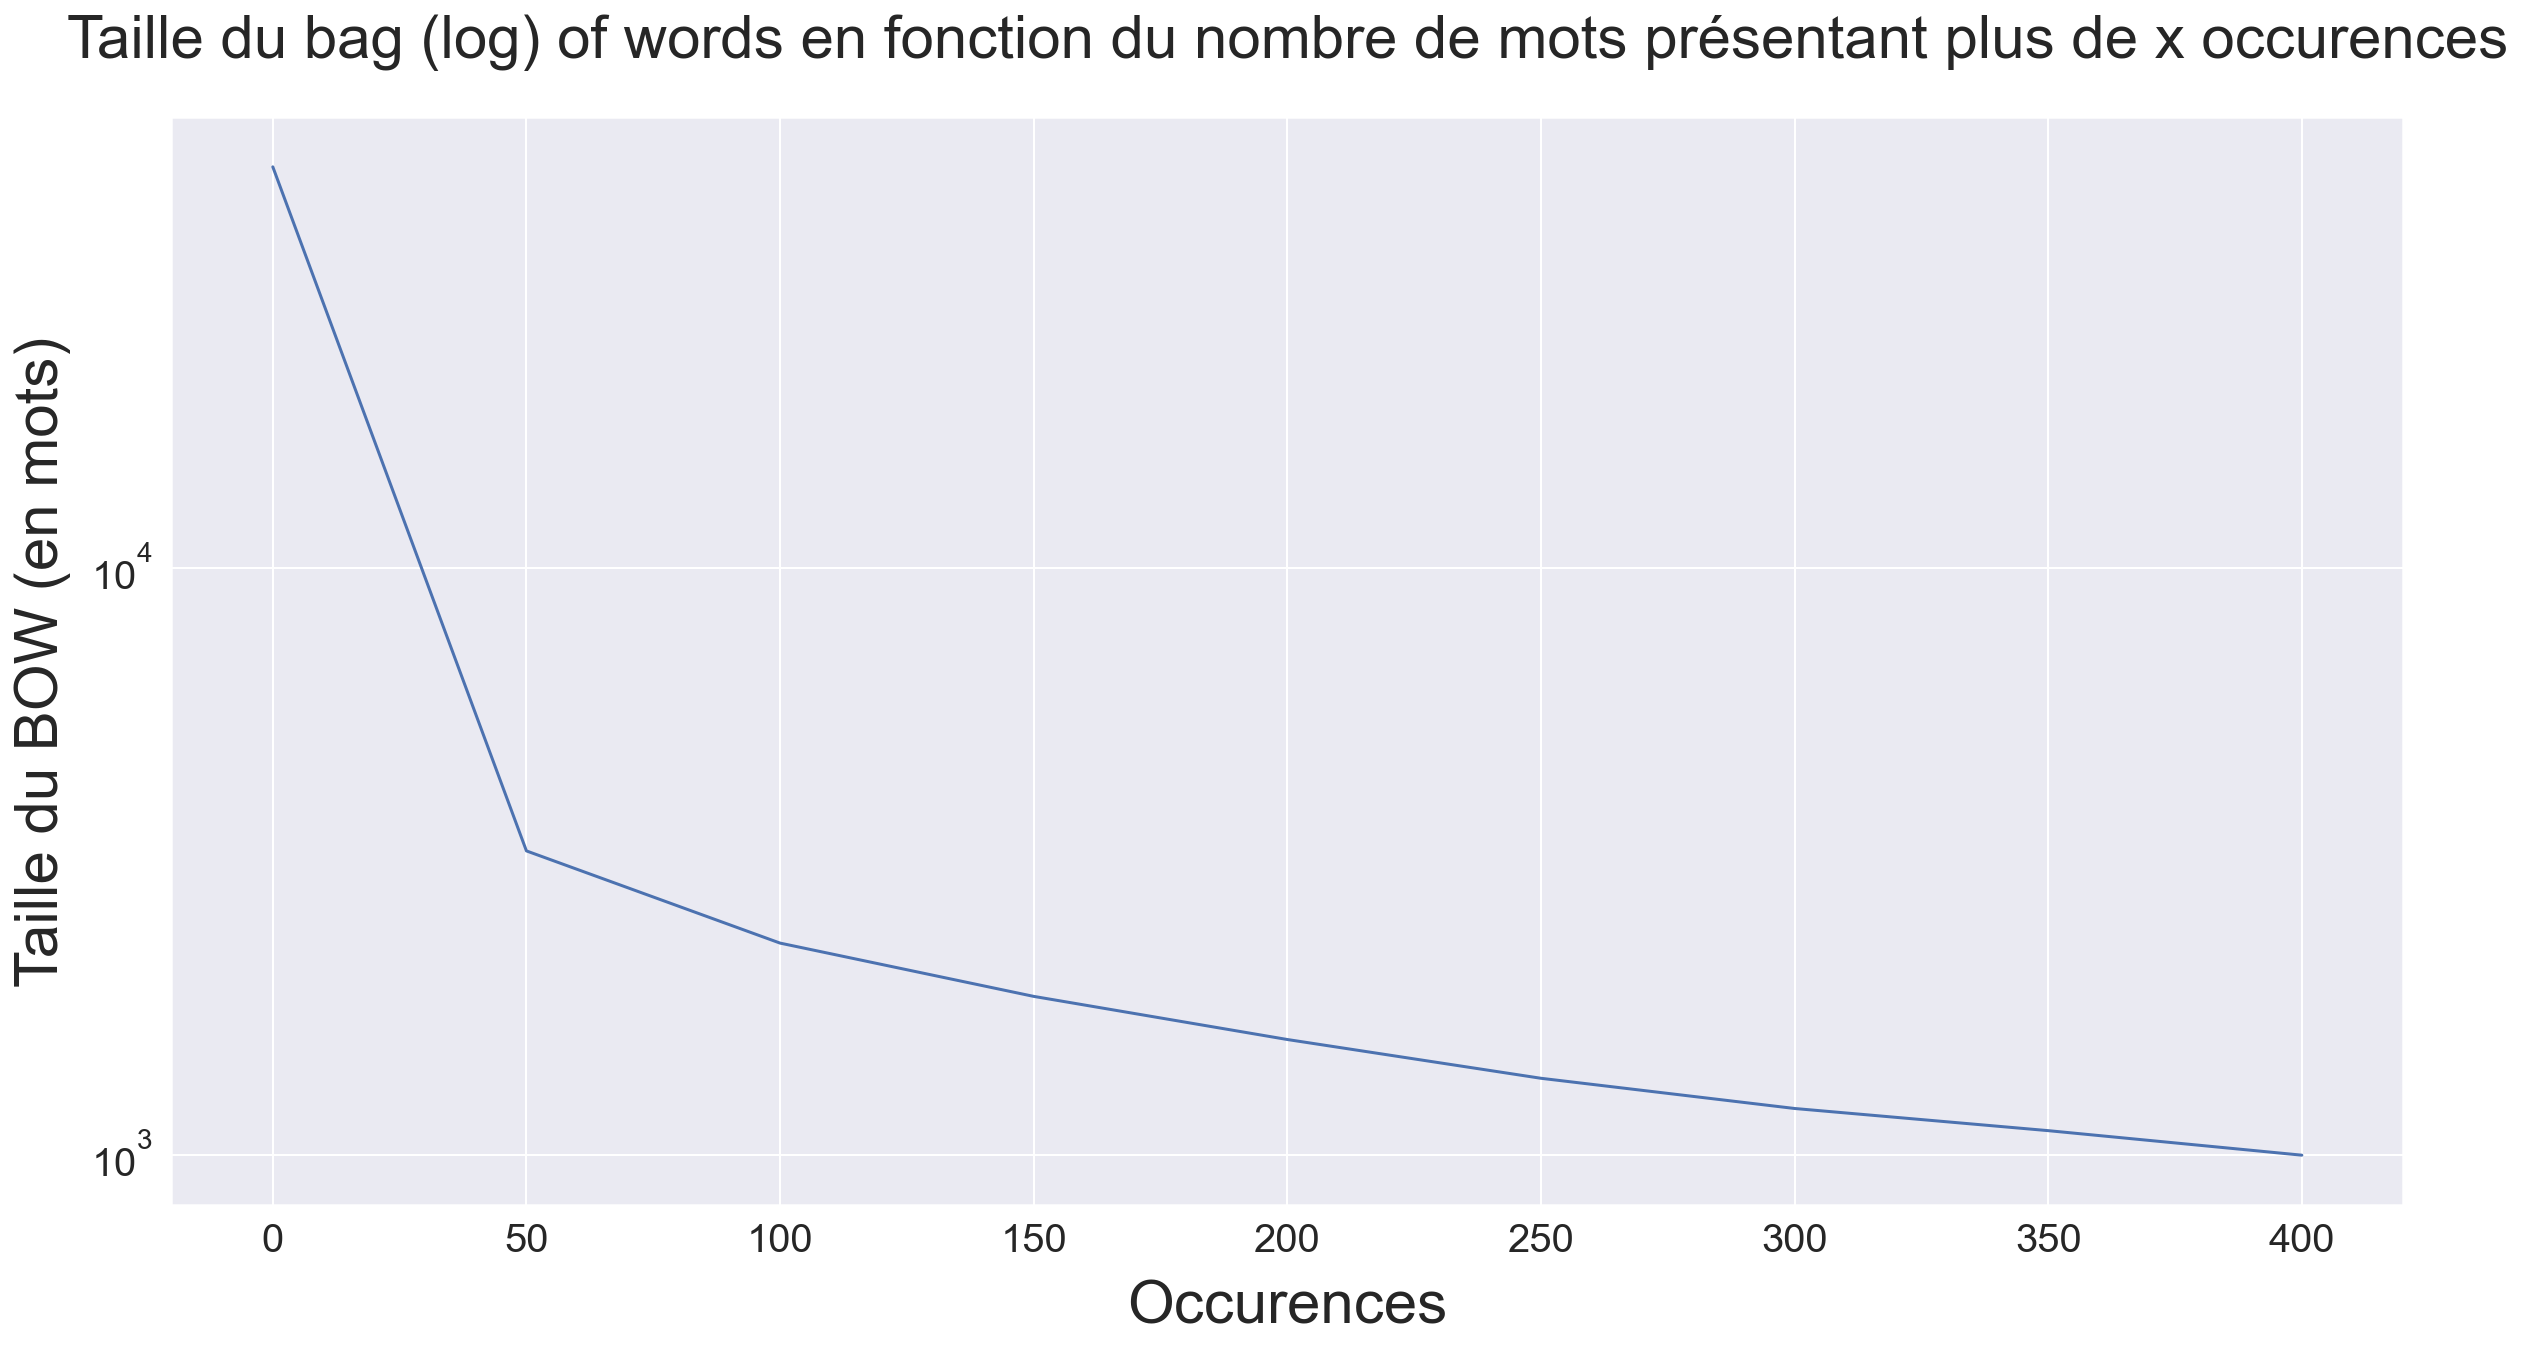

In [41]:
plt.figure(figsize=(20,10))
plt.title("Taille du bag (log) of words en fonction du nombre de mots présentant plus de x occurences", fontsize=30, pad=30)
plt.plot([i for i in range(0, 401, 50)], nb_words)
plt.xlabel("Occurences", fontsize=30, labelpad=10)
plt.ylabel("Taille du BOW (en mots)", fontsize=30, labelpad=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')

In [42]:
# On ajoute à la liste des mots à supprimer les mots présentant moins de 300 occurences
words_few_occ_post = list(posts_occ[posts_occ < 300].index)
words_few_occ_post[:10]

['perfectly',
 'reverse',
 'datatable',
 'var',
 'listbox',
 'inline',
 'markup',
 'localhost',
 'suspect',
 'maximum']

In [43]:
# On créé la liste globale des mots à retirer
words_to_del_post.extend(words_few_occ_post)

In [44]:
print("Nombre de mots différents dans les posts :" ,len(posts_occ))
clean_words_post = [word for word in list(posts_occ.index) if word not in words_to_del_post]
print("Nombre de mots différents dans les posts après traitement:" ,len(clean_words_post))
text = ' '.join(clean_words_post)
text_tokens = word_tokenize(text)
clean_words_post = [word for word in text_tokens if not word in stopwords.words()]
print("Nombre de mots différents dans les posts après traitement et stopwords:" ,len(clean_words_post))

Nombre de mots différents dans les posts : 48594
Nombre de mots différents dans les posts après traitement: 1314
Nombre de mots différents dans les posts après traitement et stopwords: 1202


In [45]:
# On retire les mots plus communs, les occurences uniques ainsi que les stop-words
df_posts_clean = df_posts.map(lambda x: [word for word in x if word in clean_words_post])

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_posts_clean.map(lambda x: ' '.join(x)))
print(vectorizer.get_feature_names()[:20])
print("\n")
print(X.shape)

['ability', 'able', 'abstract', 'accept', 'access', 'accomplish', 'accord', 'account', 'achieve', 'across', 'action', 'actionscript', 'active', 'actual', 'actually', 'add', 'addition', 'additional', 'address', 'admin']


(50000, 1195)


On écrit ci dessous la fonction qui nous servira à afficher les résultats de nos différentes réductions de dimensions
en topics.

# Approche non supervisée 

In [47]:
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]))

In [48]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9], 'n_jobs':[-1]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params, n_jobs=-1)

# Do the Grid Search
model.fit(X)

/Users/valentindeshayes/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [49]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 10, 'n_jobs': -1}
Best Log Likelihood Score:  -327958.308942631
Model Perplexity:  1702.9734711618644


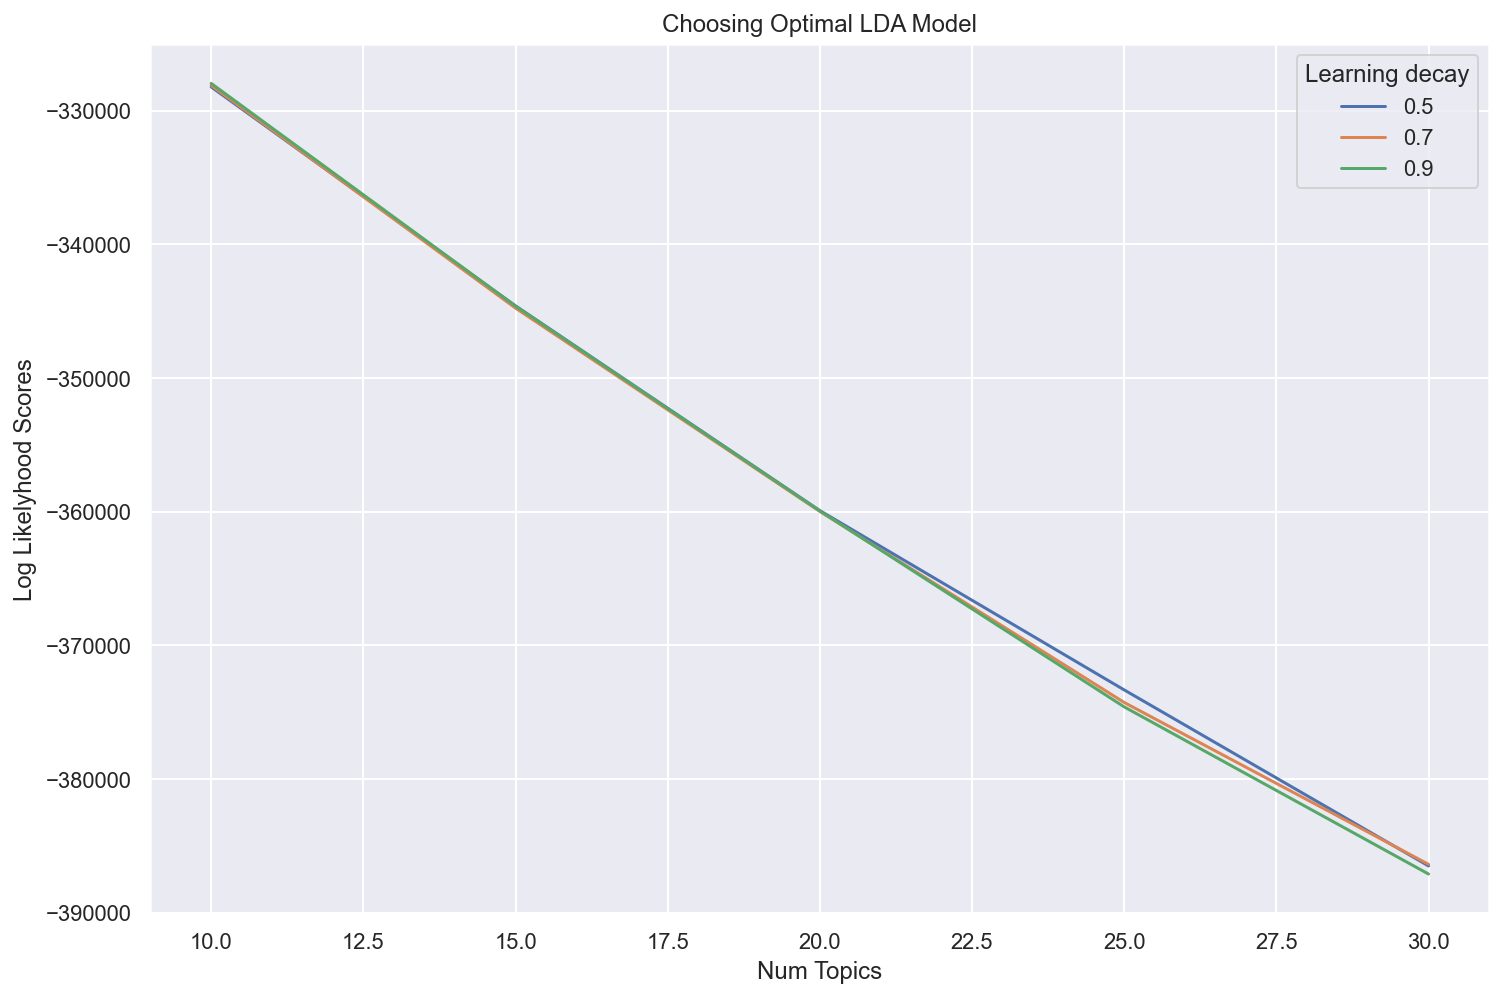

In [50]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]
mean_test_score = model.cv_results_["mean_test_score"]
log_likelyhoods_5 = [round(mean_test_score[idx]) for idx, res in enumerate(model.cv_results_["params"]) if res["learning_decay"]==0.5]
log_likelyhoods_7 = [round(mean_test_score[idx]) for idx, res in enumerate(model.cv_results_["params"]) if res["learning_decay"]==0.7]
log_likelyhoods_9 = [round(mean_test_score[idx]) for idx, res in enumerate(model.cv_results_["params"]) if res["learning_decay"]==0.9]
# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

On observe que le likelyhood score décroît avec l'augmentation du nombre de topics. Le learning decay ne semble pas vraiment influencer la qualité du modèle devant l'augmentation du nombre de topics.

In [51]:
display_topics(best_lda_model, vectorizer.get_feature_names(), 10)

Topic 0:
string character line convert xml regex text format svn directory
Topic 1:
class method object function type code call variable value property
Topic 2:
sql table database query column server data mysql row store
Topic 3:
email excel server python address send mail message ip port
Topic 4:
array list event value item bind object view sort controller
Topic 5:
page control javascript form html image button jquery cs asp
Topic 6:
thread memory application image process java time window run performance
Topic 7:
service web server net user application log asp client request
Topic 8:
window visual studio run application project error dll debug net
Topic 9:
test project good code net tool language application framework look


On observe que les différents topics contiennent de nombreux tags. Ils sont assez pertinent.
En revanche, il est assez difficile de se satisfaire de cette approche pour prédire les tags. On décide de conserver le mot le plus représentatif de chaque topic.

In [52]:
tags_topics = {}
for topic_idx, topic in enumerate(best_lda_model.components_):
    tags_topics[topic_idx] = vectorizer.get_feature_names()[topic.argsort()[:-1-1:-1][0]]

In [53]:
tags_topics

{0: 'string',
 1: 'class',
 2: 'sql',
 3: 'email',
 4: 'array',
 5: 'page',
 6: 'thread',
 7: 'service',
 8: 'window',
 9: 'test'}

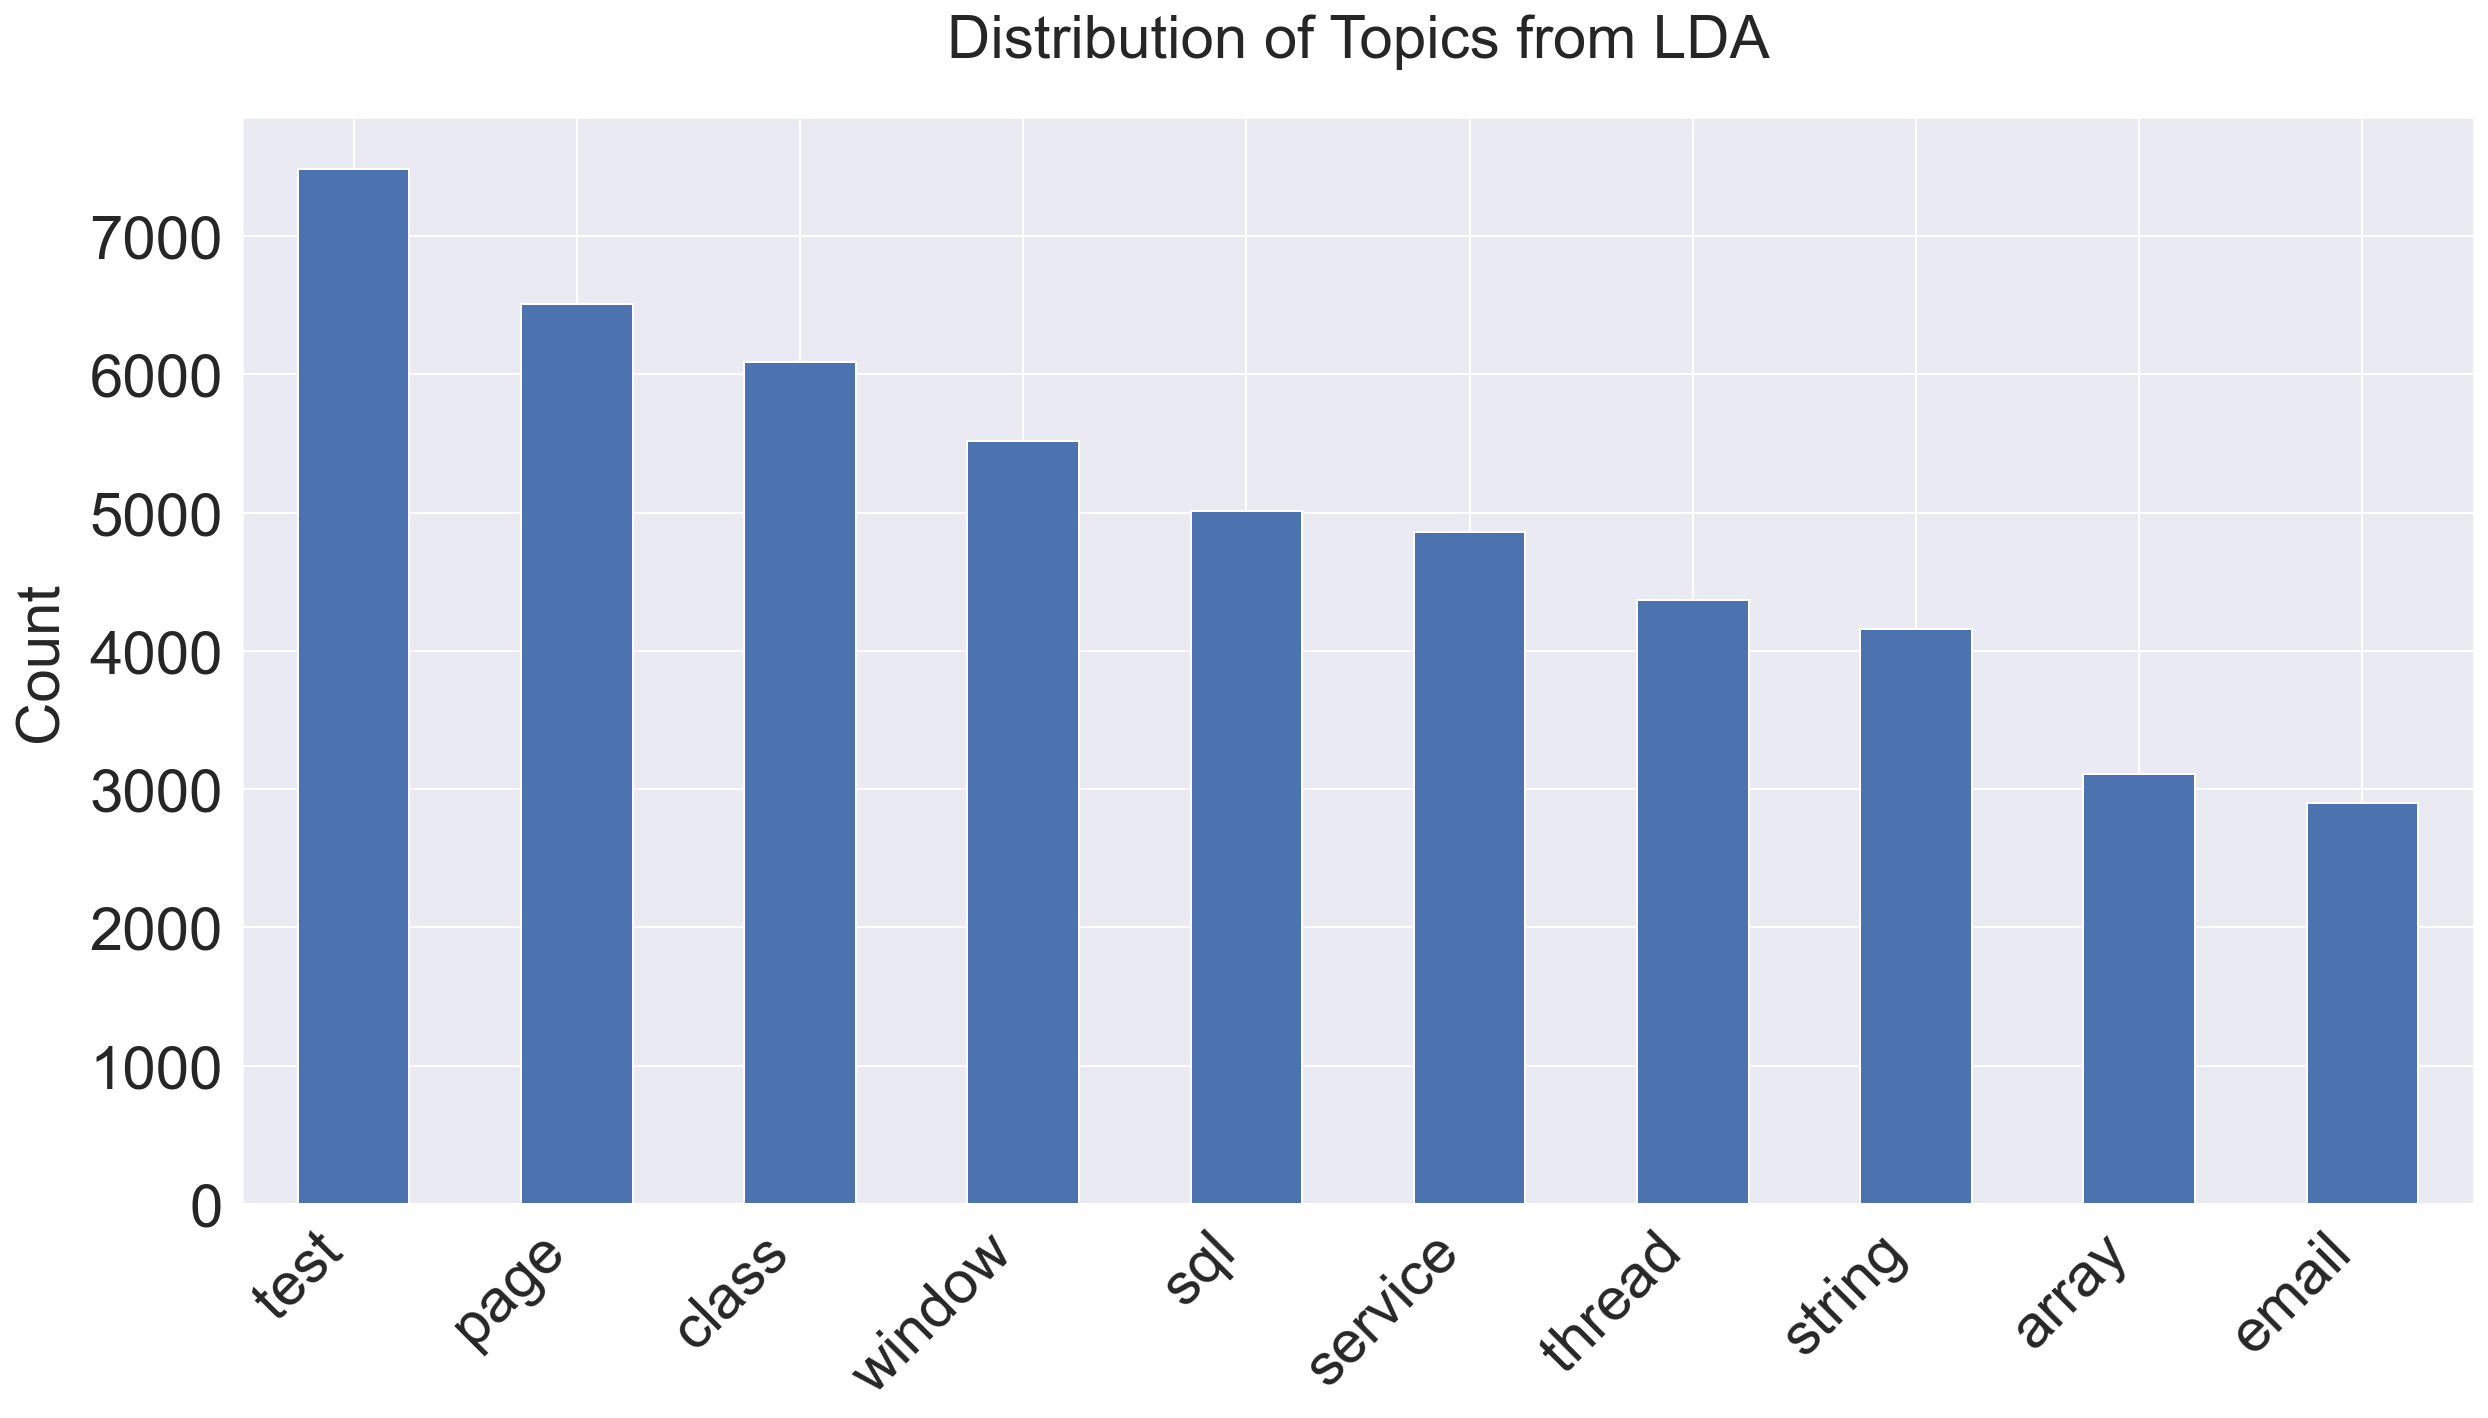

In [54]:
y_pred = best_lda_model.transform(X)
argmax_pred = np.argmax(y_pred, axis=1)
tags_pred_uzu = pd.Series(argmax_pred).replace(tags_topics)

plt.figure(figsize=(20,10))
tags_pred_uzu.value_counts().plot.bar();
plt.xticks(rotation=45, ha="right");
plt.title("Distribution of Topics from LDA", fontsize=30, pad=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel("Count", fontsize=30, labelpad=10);

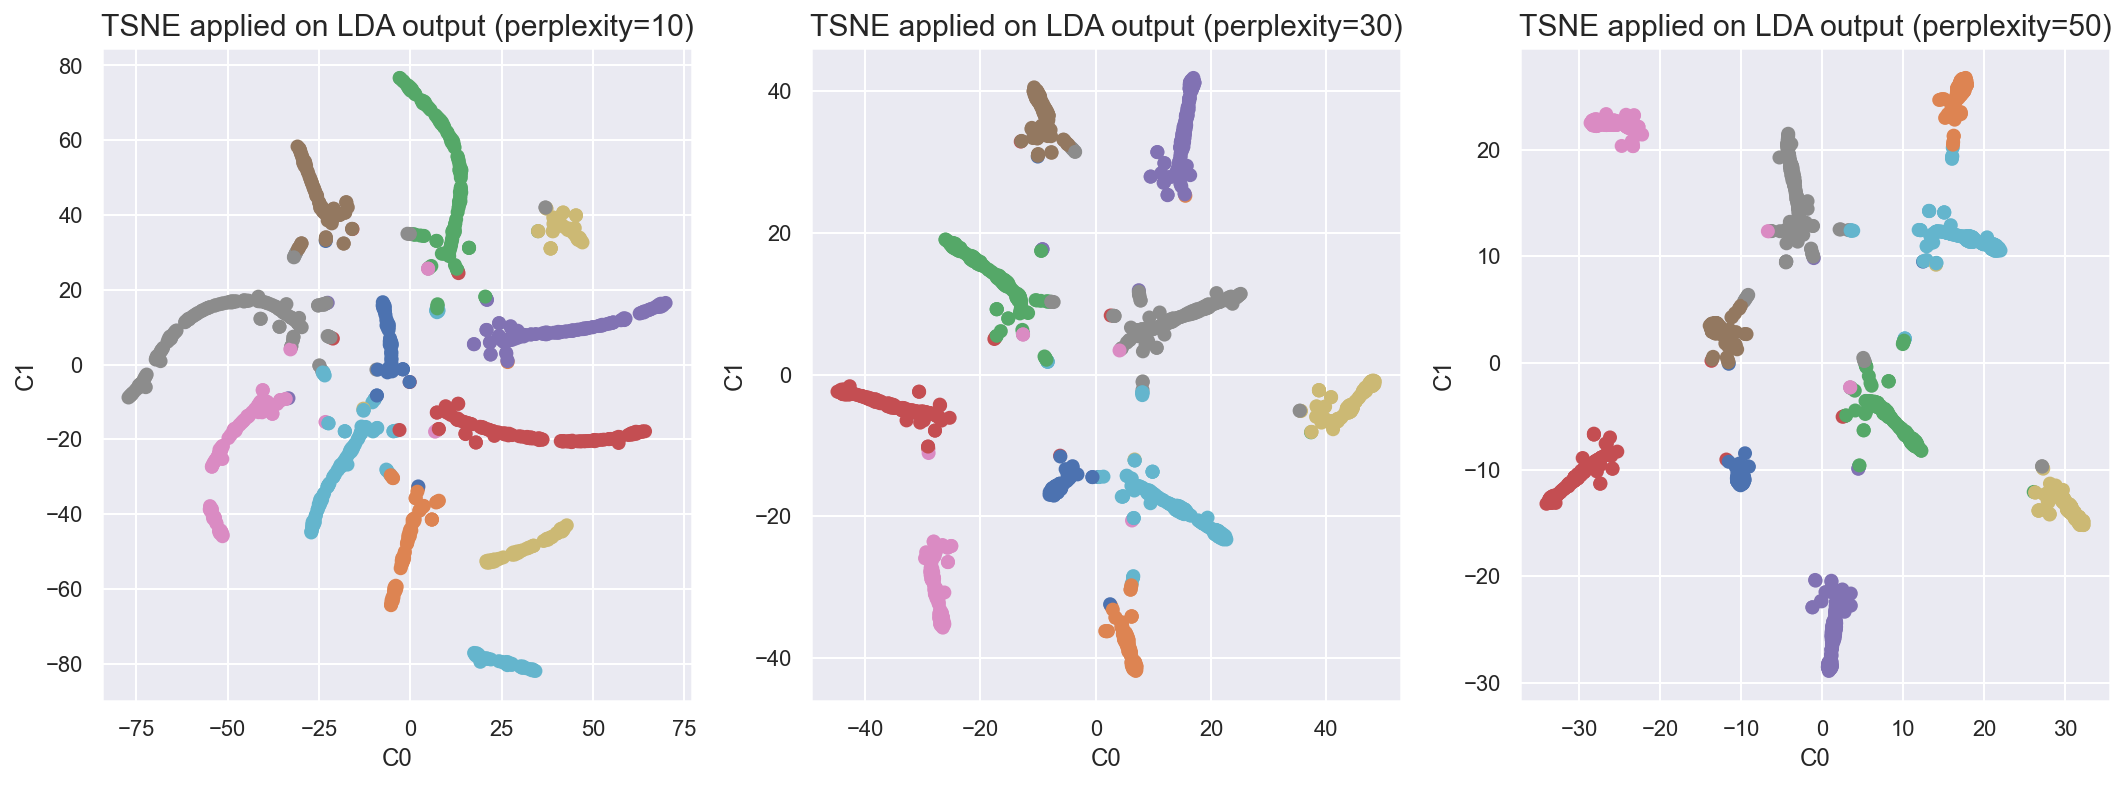

In [142]:
from sklearn.manifold import TSNE

# La TSNE étant assez longue a effectuer, on restreint l'étude à un échantillon
y_pred_sample = pd.DataFrame(y_pred).sample(1000)

plt.figure(figsize=(6*3,6))

for i, p in enumerate((10, 30, 50)):
    plt.subplot(1, 3, i+1)
    tsne = TSNE(n_jobs=-1, perplexity=p)
    pred_tsne = tsne.fit_transform(y_pred_sample)

    color = ['C'+str(i) for i in argmax_pred[y_pred_sample.index]]
    labels = [tags_topics[i] for i in argmax_pred[y_pred_sample.index]]

    plt.scatter(pred_tsne[:, 0], pred_tsne[:, 1], c=color, label=labels)
    plt.xlabel("C0")
    plt.ylabel("C1")
    plt.title(f"TSNE applied on LDA output (perplexity={p})", fontsize=15);

### Truncated SVD

On teste ensuite la truncated SVD comme technique de réduction de dimension, recommandé dans la doc sklearn en input de la t-SNE. Le but est de visualiser les données sans utiliser la LDA.

In [143]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import scale

tsvd = TruncatedSVD(n_components=X.shape[1]-1)
X_reduced_tsdv = tsvd.fit_transform(X)  # no need to scale according to sklearn doc
print("new shape", X_reduced_tsdv.shape)

new shape (50000, 1193)


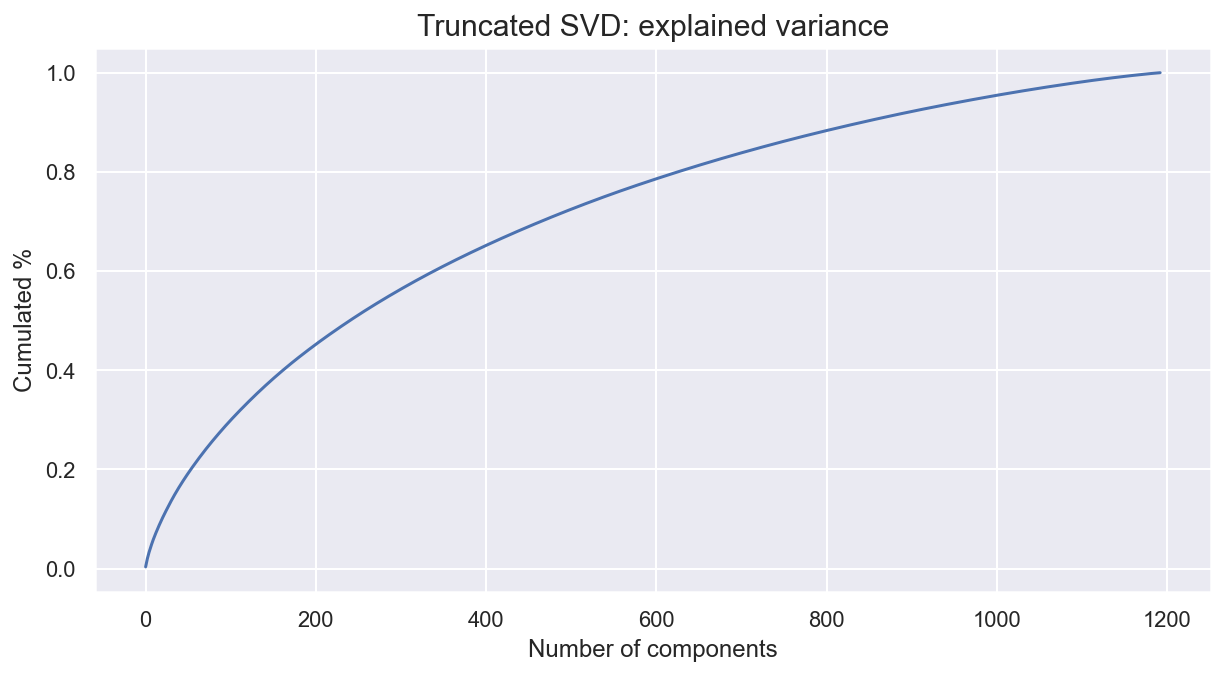

In [144]:
plt.figure(figsize=(10, 5))
plt.plot(tsvd.explained_variance_ratio_.cumsum())
plt.ylabel("Cumulated %")
plt.xlabel("Number of components")
plt.title("Truncated SVD: explained variance", fontsize=15);

A l'aide de la truncated SVD, on observe que 80% de la variance est expliquée par légèrement plus de 600 mots du jeu de données. On pourrait donc réduire d'avantage notre bag of words.

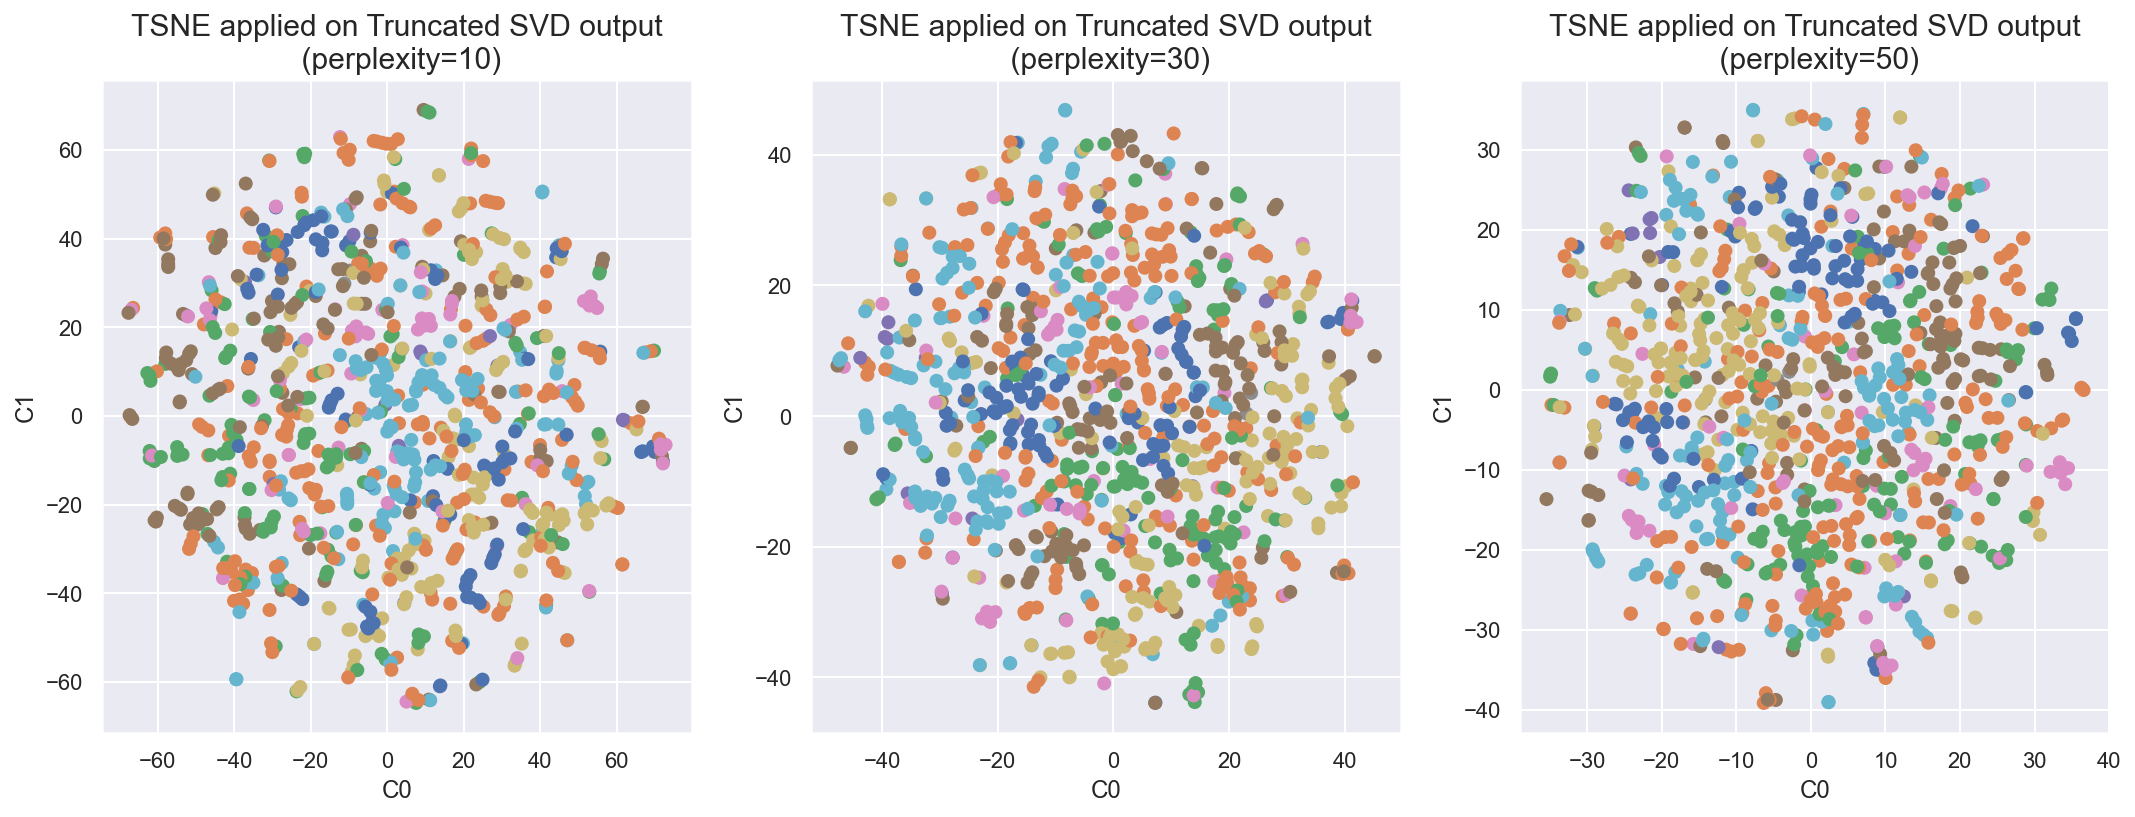

In [238]:
from sklearn.manifold import TSNE

plt.figure(figsize=(6*3,6))

for i, p in enumerate((10, 30, 50)):
    plt.subplot(1, 3, i+1)
    tsne = TSNE(n_jobs=-1, perplexity=p)
    pred_tsne = tsne.fit_transform(X_reduced_tsdv[y_pred_sample.index])

    color = ['C'+str(i) for i in argmax_pred[y_pred_sample.index]]
    labels = [tags_topics[i] for i in argmax_pred[y_pred_sample.index]]

    plt.scatter(pred_tsne[:, 0], pred_tsne[:, 1], c=color, label=labels)
    plt.xlabel("C0")
    plt.ylabel("C1")
    plt.title(f"TSNE applied on Truncated SVD output\n (perplexity={p})", fontsize=15);

Les résultats sont en revanche moins évident à l'observation de la TSNE sur cette SVD.

### Décomposition NMF
note: on essaie de trouver le nombre de dimension optimal pour la NMF à titre de réduction

In [145]:
from sklearn.decomposition import NMF

nmf_scores = {}
for i, n in enumerate([5, 10, 15, 30, 50, 100, 300]):
    nmf = NMF(
        n_components=n, 
        alpha=.1, 
        l1_ratio=.5, 
        init='nndsvd')

    nmf.fit(X)
    print(f"n = {n}, reconstruction_err_ = {nmf.reconstruction_err_}")
    nmf_scores[n] = nmf.reconstruction_err_

n = 5, reconstruction_err_ = 217.22522109653156
n = 10, reconstruction_err_ = 214.50974397672428
n = 15, reconstruction_err_ = 212.21887690004385
n = 30, reconstruction_err_ = 206.11701596592837
n = 50, reconstruction_err_ = 199.56007903626062
n = 100, reconstruction_err_ = 186.55278252020727
n = 300, reconstruction_err_ = 176.44893935643455


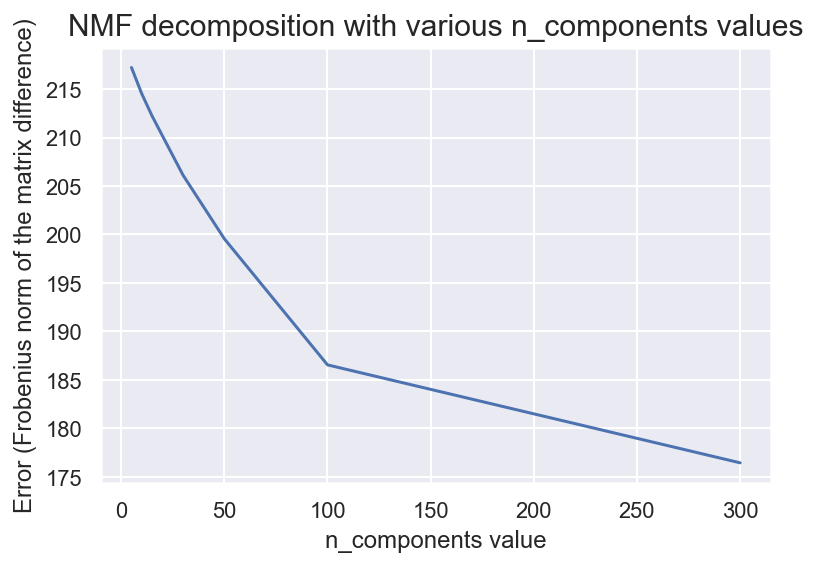

In [146]:
plt.plot(list(nmf_scores), list(nmf_scores.values()))
plt.xlabel("n_components value")
plt.ylabel("Error (Frobenius norm of the matrix difference)")
plt.title("NMF decomposition with various n_components values", fontsize=15);

n=300 est un peu long mais le résultat montre qu'une réduction autour de 300-500 features est possible sans trop de perte d'infos. 
Pour éviter de recalculer n=300 on utilise directement l'objet nmf fitté et ses dimensions en input de la t-SNE

In [147]:
X_reduced_nmf = nmf.transform(X)
X_reduced_nmf.shape

(50000, 300)

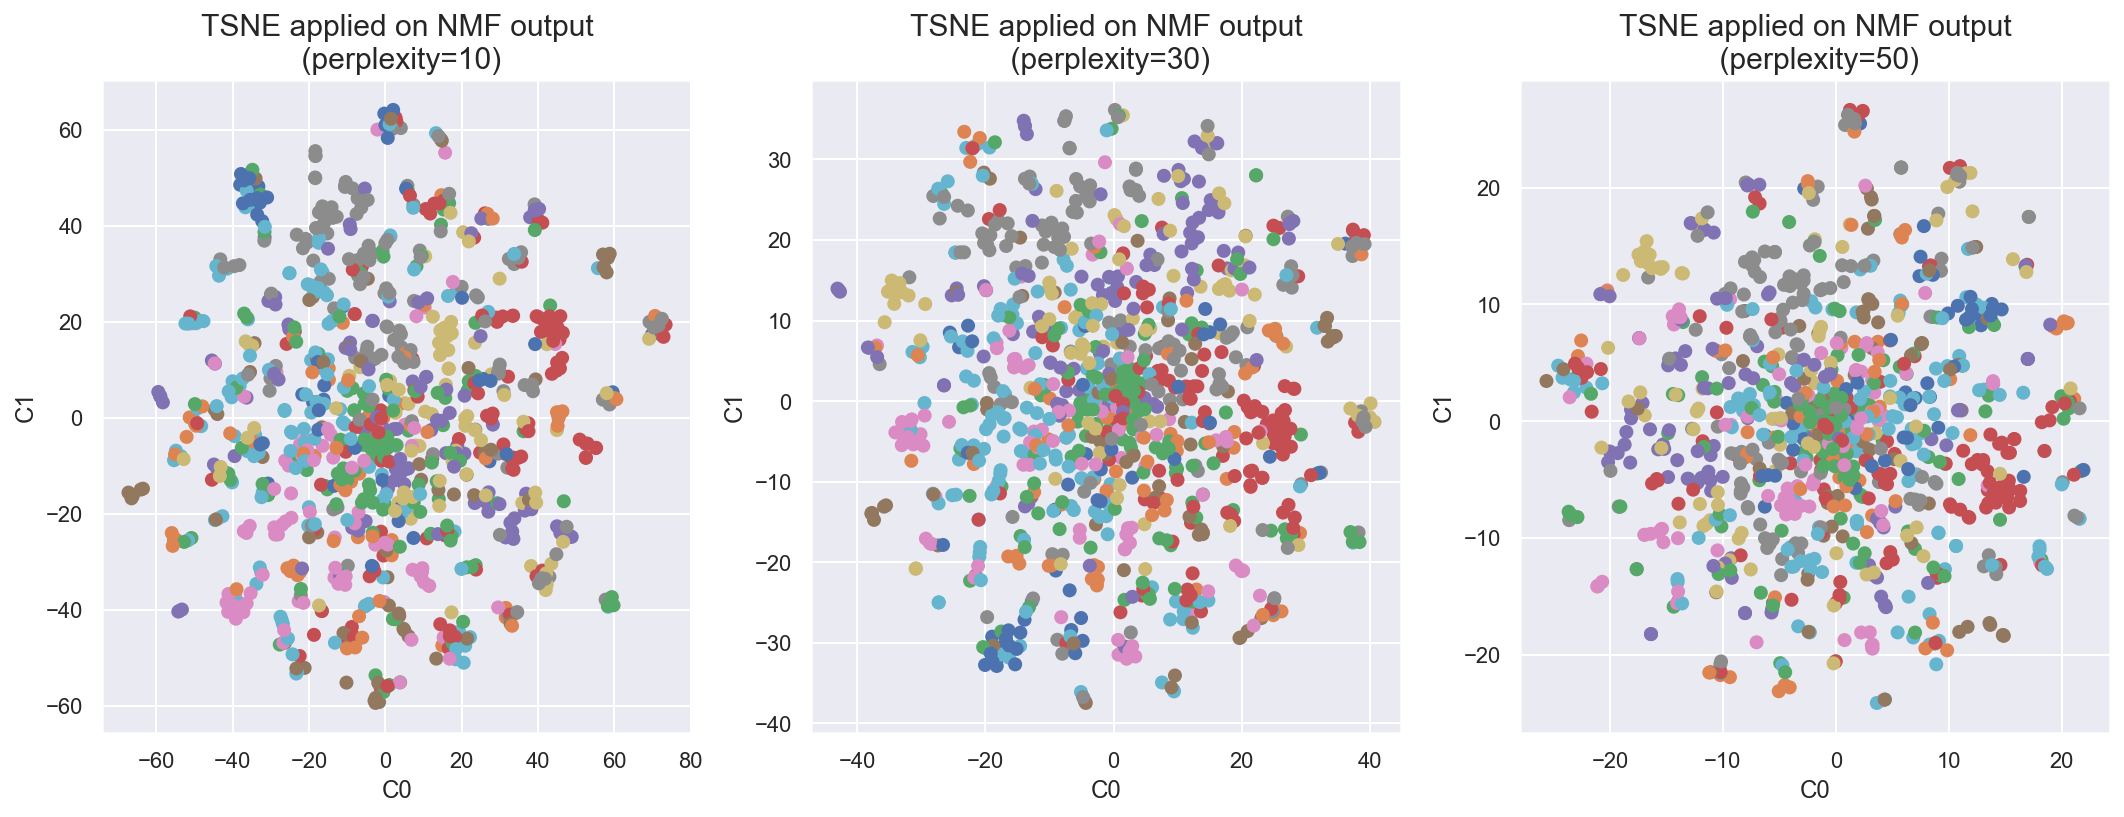

In [148]:
from sklearn.manifold import TSNE

plt.figure(figsize=(6*3,6))

for i, p in enumerate((10, 30, 50)):
    plt.subplot(1, 3, i+1)
    tsne = TSNE(n_jobs=-1, perplexity=p)
    pred_tsne = tsne.fit_transform(X_reduced_nmf[y_pred_sample.index])

    color = ['C'+str(i) for i in argmax_pred[y_pred_sample.index]]
    labels = [tags_topics[i] for i in argmax_pred[y_pred_sample.index]]

    plt.scatter(pred_tsne[:, 0], pred_tsne[:, 1], c=color, label=labels)
    plt.xlabel("C0")
    plt.ylabel("C1")
    plt.title(f"TSNE applied on NMF output\n (perplexity={p})", fontsize=15);

Pas de résultat probant non plus. On essaie avec n_components = 10 comme la LDA:

In [149]:
nmf10 = NMF(
    n_components=10, 
    alpha=.1, 
    l1_ratio=.5, 
    init='nndsvd')
X_reduced_nmf_10 = nmf10.fit_transform(X)
X_reduced_nmf_10.shape

(50000, 10)

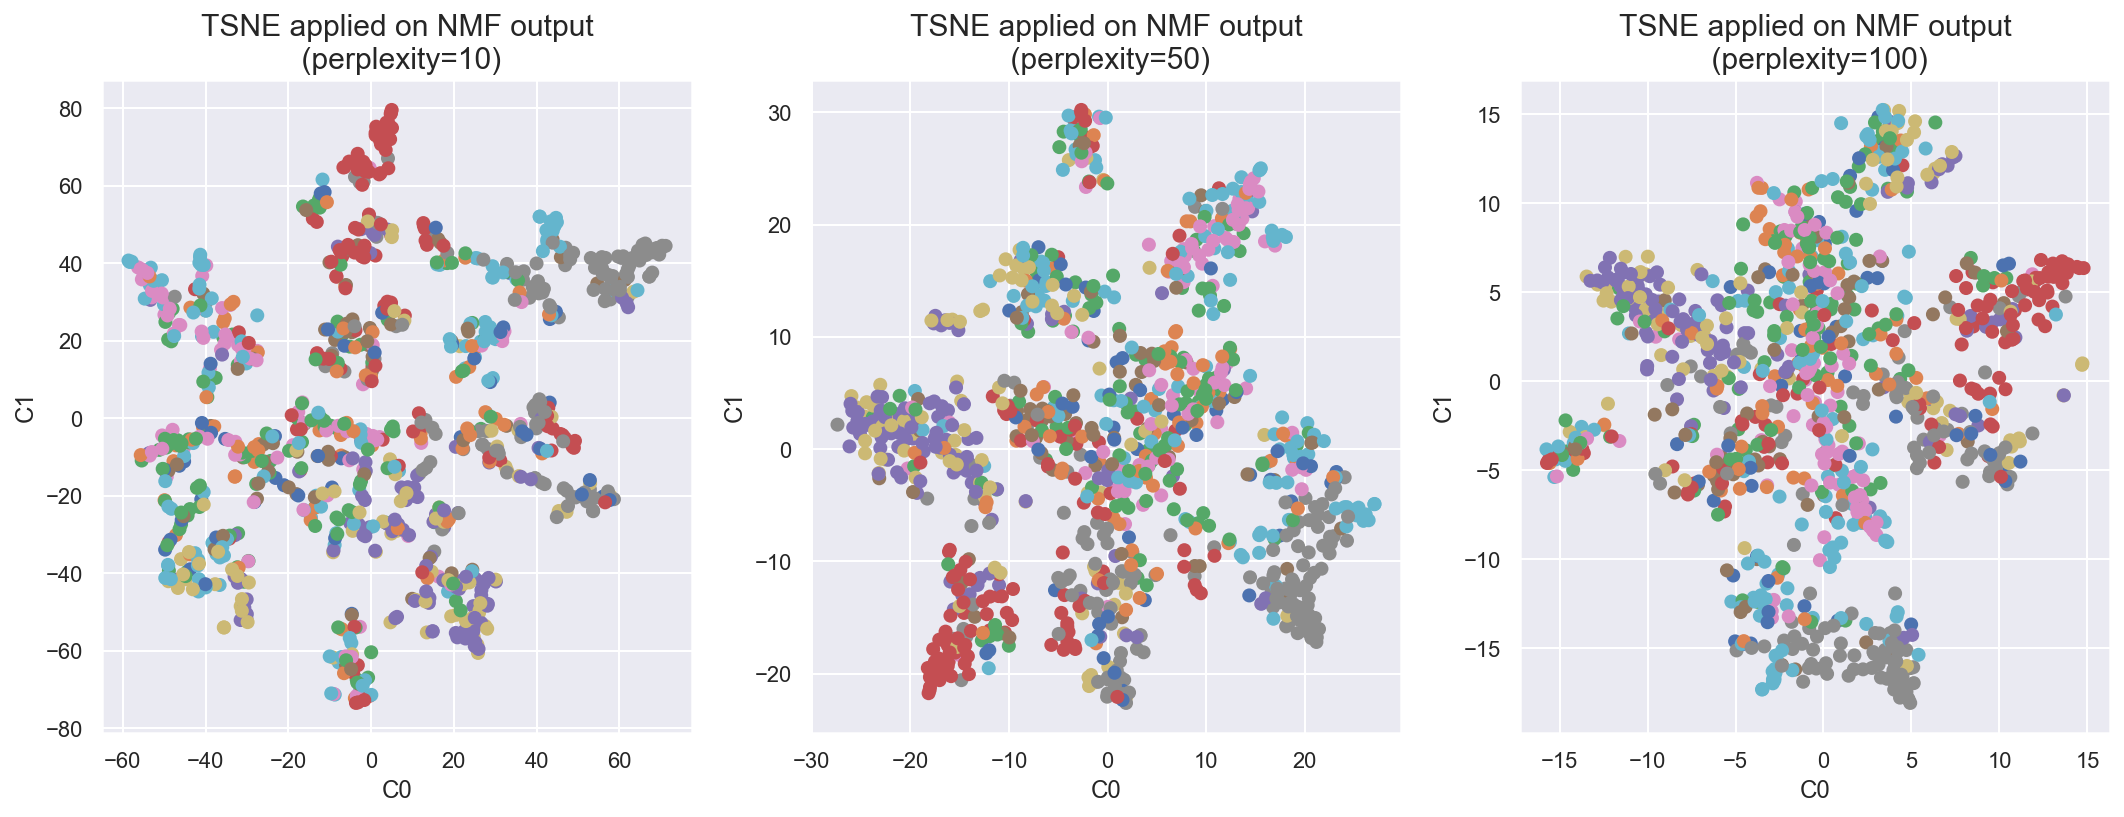

In [150]:
from sklearn.manifold import TSNE

plt.figure(figsize=(6*3,6))

for i, p in enumerate((10, 50, 100)):
    plt.subplot(1, 3, i+1)
    tsne = TSNE(n_jobs=-1, perplexity=p)
    pred_tsne = tsne.fit_transform(X_reduced_nmf_10[y_pred_sample.index])

    color = ['C'+str(i) for i in argmax_pred[y_pred_sample.index]]
    labels = [tags_topics[i] for i in argmax_pred[y_pred_sample.index]]

    plt.scatter(pred_tsne[:, 0], pred_tsne[:, 1], c=color, label=labels)
    plt.xlabel("C0")
    plt.ylabel("C1")
    plt.title(f"TSNE applied on NMF output\n (perplexity={p})", fontsize=15);

# Approche supervisée

## Optimisation de la target tags

Pour les tags, on souhaite simplement supprimer les moins représentés. Ils n'apportent pas de réelle information
et sont souvent des erreurs de typo.

In [193]:
tags_occ.head(10)

c#            6440
.net          5170
java          3752
asp.net       3254
c++           2690
javascript    2339
php           1920
sql-server    1838
python        1771
sql           1754
dtype: int64

In [194]:
tags_occ.tail()

user-activity    1
urlhacks         1
taskkill         1
tortoisebzr      1
mysql5           1
dtype: int64

Observons la distribution du nombre de tags.

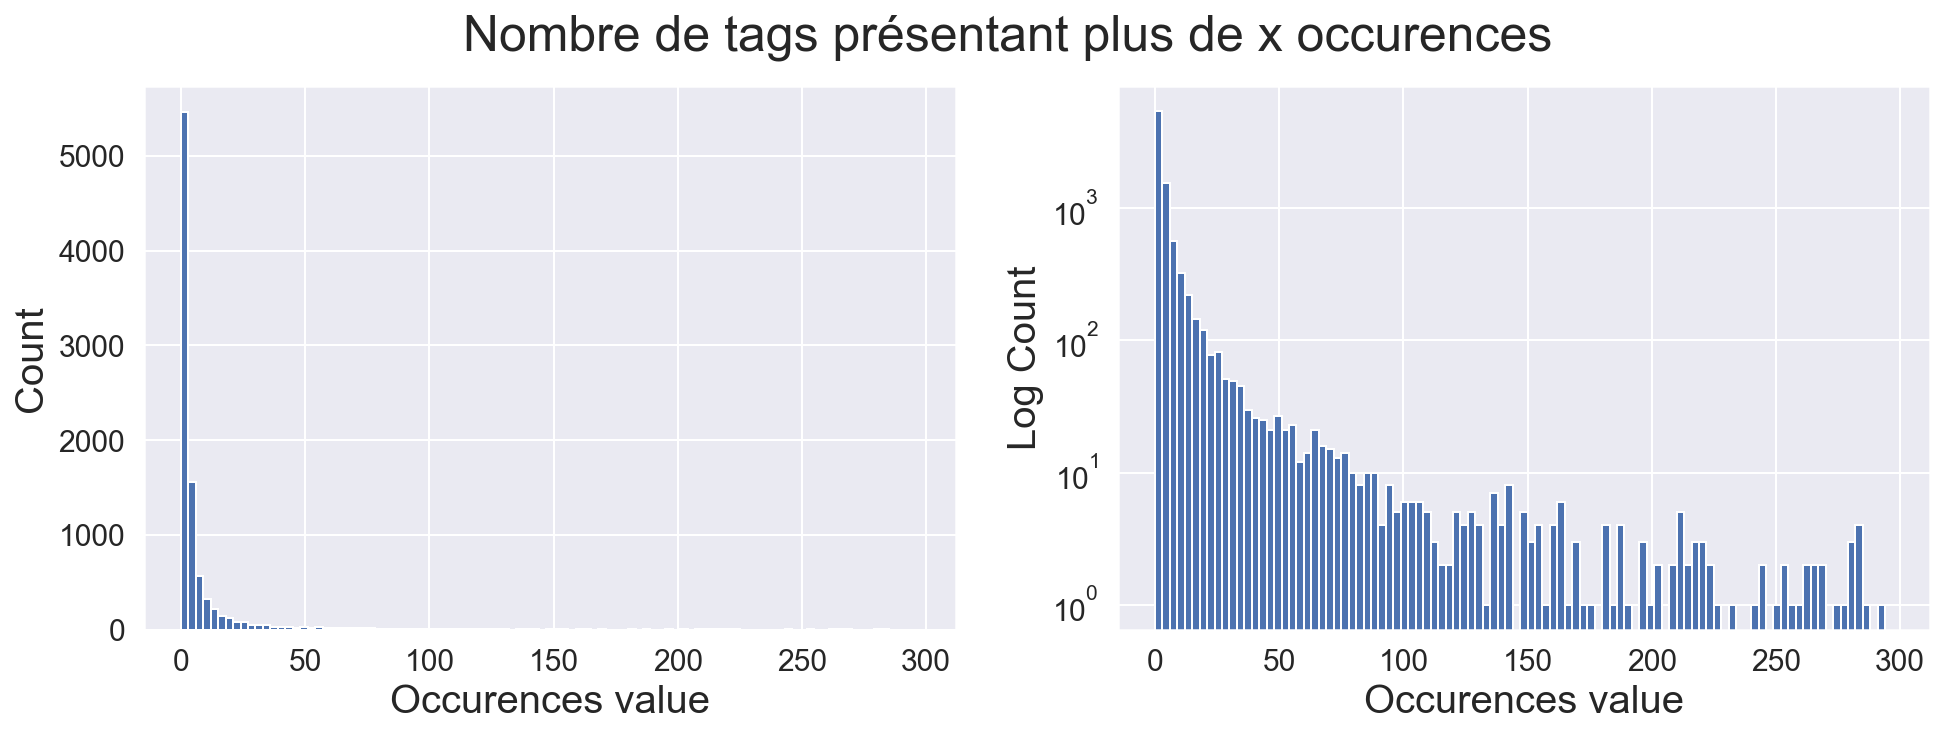

In [63]:
plt.figure(figsize=(16,5))
plt.suptitle("Nombre de tags présentant plus de x occurences", fontsize=25)
plt.subplot(1, 2, 1)
plt.hist(tags_occ, bins=np.arange(0, 300, 3))
plt.ylabel("Count", fontsize=20)
plt.xlabel("Occurences value", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(1, 2, 2)
plt.hist(tags_occ, bins=np.arange(0, 300, 3))
plt.yscale('log')
plt.ylabel("Log Count", fontsize=20)
plt.xlabel("Occurences value", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

Note: au regard de cette distribution on pourrait très franchement ne garder que les 50 premiers tags

In [205]:
clean_tags = tags_occ[tags_occ > 200]
print(f"Number of remaining tags: {len(clean_tags)}")

Number of remaining tags: 111


In [206]:
df_tags_clean = df_tags.map(lambda x: [word for word in x if word in list(clean_tags.index)])

In [231]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_tags = mlb.fit_transform(df_tags_clean)

df_test = df_tags_clean.copy()

In [232]:
empty_ids = []
for i in range(len(mlb_tags)):
    if sum(mlb_tags[i]) == 0: empty_ids.append(i)

print("Il y a", len(empty_ids), "échantillons sans tags")

Il y a 6518 échantillons sans tags


# Modélisation

In [233]:
pd.DataFrame({
    "count": pd.Series(mlb_tags.sum(axis=1)).value_counts(),
    "share (%)": pd.Series(mlb_tags.sum(axis=1)).value_counts(normalize=True)*100
})

count  share (%)
1  20316     40.632
2  16170     32.340
0   6518     13.036
3   5673     11.346
4   1197      2.394
5    126      0.252

On observe que les échantillons sans tags, au nombre de 6518, représente plus de 13% du jeu de données.
On décide donc de les supprimer de nos jeux d'entraînements et de tests.

In [234]:
not_empty_bool = [False if i in empty_ids else True for i in range(len(mlb_tags))]
X_cleaned = X[not_empty_bool]
mlb_tags_cleaned = mlb_tags[not_empty_bool]

In [264]:
print(X_cleaned.shape)
print(mlb_tags_cleaned.shape)

(43482, 1194)
(43482, 111)


In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, mlb_tags_cleaned, test_size=0.2)

## OneVsRestClassifier avec Regression Logistique

In [237]:
def display_metrics(y_test, y_pred, precision_recall_report=False):
    print("accuracy :", round(metrics.accuracy_score(y_test, y_pred), 4))
    print("macro f1 score :", round(metrics.f1_score(y_test, y_pred, average = 'macro'), 4))
    print("micro f1 score :", round(metrics.f1_score(y_test, y_pred, average = 'micro'), 4))
    print("weighted f1 score :", round(metrics.f1_score(y_test, y_pred, average = 'weighted'), 4))
    print("jaccard score:", round(metrics.jaccard_score(y_test, y_pred, average="weighted"), 4))

    if precision_recall_report:
        print(len(np.unique(y_pred)))
        target_names = mlb.classes_.tolist() if len(y_pred.shape) > 1 and y_pred.shape[1] == len(mlb.classes_.tolist()) else None
        print("Precision recall report :\n", metrics.classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

In [249]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

start = datetime.now()

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

display_metrics(y_test, y_pred, precision_recall_report=True)

#'micro':
#Calculate metrics globally by counting the total true positives, false negatives and false positives.

#'macro':
#Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print("Time taken to run this cell :", datetime.now() - start)

accuracy : 0.2486
macro f1 score : 0.4771
micro f1 score : 0.5326
weighted f1 score : 0.5029
jaccard score: 0.3665
2
Precision recall report :
                     precision    recall  f1-score   support

              .net       0.70      0.31      0.43      1092
          .net-2.0       0.00      0.00      0.00        58
          .net-3.5       0.50      0.05      0.09        59
    actionscript-3       0.65      0.22      0.33        49
              ajax       0.68      0.38      0.49        99
         algorithm       0.74      0.39      0.51       111
            apache       0.77      0.56      0.65        72
       apache-flex       0.90      0.66      0.76        68
      architecture       0.73      0.16      0.26        51
            arrays       0.64      0.45      0.53        67
           asp.net       0.81      0.54      0.65       658
       asp.net-mvc       0.84      0.70      0.76       155
              bash       0.82      0.50      0.62        36
           brow

Pour ce classifier, on observe des prédictions assez bonnes d'après les metrics.
.....

---

On souhaite maintenant comparer ce classifier avec les données non traitées en entrée.
On se contente de vectoriser les données contenues dans les posts et de MultiLabelBinarizer les tags prédits.

In [252]:
# On vectorise toutes les données en entrées
vectorizer = TfidfVectorizer()
X_base = vectorizer.fit_transform(df_posts.map(lambda x: ' '.join(x)))
print(vectorizer.get_feature_names()[:20])
print("\n")
print(X_base.shape)

['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaad', 'aaaaaaaaaaaaaaaaaaaaaakqaaaaaaeyeaaaaaaaargqaaeye', 'aaaaaaaaaaad', 'aaaaaaaaeaaaaaaabgaaneiaaa', 'aaaaaaaand', 'aaaaaaaandyaaaaaaaa', 'aaaaaaaandyaacqa', 'aaaaaaaapaaaaaaaaaaaaaaaaaaaaaaaaaaaaaad', 'aaaaaaaargqaaaaaaabgbaaaaaaaaeyeaaaaaaaargqaabqaaaaaaaaaaaaaafoeaaaaaaaa', 'aaaaaab', 'aaaaaaba', 'aaaaaabb', 'aaaaaac', 'aaaaaad']


(50000, 49006)


On retrouve à nouveau des chaines de caractères très peu pertinentes en entrée de notre modèle.

Pour les tags en revanche, on conserve notre liste de tags nettoyés afin de pouvoir comparer le pouvoir de prédiction de nos modèles.

In [244]:
mlb_tags.shape

(50000, 111)

In [245]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, mlb_tags, test_size=0.2)

In [250]:
start = datetime.now()

classifier_base = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier_base.fit(X_train_base, y_train_base)
y_pred_base = classifier_base.predict(X_test_base)

display_metrics(y_test_base, y_pred_base, precision_recall_report=True)

print("Time taken to run this cell :", datetime.now() - start)

accuracy : 0.3237
macro f1 score : 0.4814
micro f1 score : 0.5386
weighted f1 score : 0.5137
jaccard score: 0.3737
2
Precision recall report :
                     precision    recall  f1-score   support

              .net       0.60      0.29      0.39       996
          .net-2.0       0.00      0.00      0.00        49
          .net-3.5       0.00      0.00      0.00        58
    actionscript-3       0.45      0.24      0.31        42
              ajax       0.71      0.43      0.53       110
         algorithm       0.82      0.44      0.58        95
            apache       0.78      0.56      0.65        57
       apache-flex       0.92      0.67      0.77        69
      architecture       0.42      0.10      0.17        48
            arrays       0.61      0.45      0.52        49
           asp.net       0.82      0.55      0.66       637
       asp.net-mvc       0.87      0.71      0.78       155
              bash       0.68      0.37      0.48        41
           brow

On observe des résultats très similaires au classifier avec les données non traités en entrée. 
On pourrait donc remettre en question la pertinence du preprocessing pour les résultats de performance du modèle. 
En revanche, on observe que le modèle avec les données préprocessées produits des résultats en deux fois moins de temps. Cela présente un intérêt de taille pour la scalabilité de notre modèle. 
Pour rappel, nous n'avons sélectionné que 50000 posts Stackoverflow là où il en existe probablement des centaines de millions !

A titre indicatif, on essaye ce même classifier sur l'intégralité des tags non traités pour mesurer le pouvoir de prédiciton.

In [258]:
mlb_full = MultiLabelBinarizer()
mlb_tags_full = mlb_full.fit_transform(df_tags)

In [259]:
print(X_base.shape)
print(mlb_tags_full.shape)

(50000, 49006)
(50000, 9257)


In [260]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_base, mlb_tags_full, test_size=0.2)

In [261]:
start = datetime.now()

classifier_full = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier_full.fit(X_train_full, y_train_full)
y_pred_full = classifier_full.predict(X_test_full)

display_metrics(y_test_full, y_pred_full, precision_recall_report=True)

print("Time taken to run this cell :", datetime.now() - start)

accuracy : 0.0732


/Users/valentindeshayes/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1514: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


macro f1 score : 0.0492
micro f1 score : 0.439
weighted f1 score : 0.389


/Users/valentindeshayes/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


jaccard score: 0.281
2
Precision recall report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      0.71      0.77         7
           2       0.00      0.00      0.00         1
           3       0.66      0.33      0.44      1076
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         5
           6       0.33      0.02      0.04        47
           7       0.00      0.00      0.00         2
           8       0.33      0.05      0.09        58
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.

Conforfmément à nos attentes, les résultats sont nettements moins bons lorsque l'on ne procède à aucun preprocessing.
Cela vaut pour la prédiction de tags car de très nombreux tags viennent noyer le pouvoir de prédiction du modèle car très peu représenté.
Cela vaut également pour les temps de calculs qui explosent.
On a donc montré ici la pertinence de notre preprocessing appliqué aux données en entrée.

## Best model

Nous avons précédemment testé le OneVsRestClassifier avec une régression logistique. Voyons maintenant si on peut améliorer notre modèle en optimisant les hyperparamètres. On peut par exemple ajouter la loss 'hinge' corespondant à un SVM, jouer sur le paramètre alpha du classifier et également sur la penalty, L1 L2 ou Elasticnet.

In [254]:
from sklearn.model_selection import GridSearchCV

classifier = OneVsRestClassifier(SGDClassifier())
# Define Search Param
search_params = {'estimator__loss': ['log', 'hinge'], 
                 'estimator__alpha': [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1],
                 'estimator__penalty':['l2', 'l1', 'elasticnet']}

model_tunning = GridSearchCV(estimator = classifier, param_grid=search_params, 
                             cv=3, scoring='f1_micro',n_jobs=-1)

# Do the Grid Search
model_tunning.fit(X_cleaned, mlb_tags_cleaned)

/Users/valentindeshayes/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, error_score=nan,
             estimator=OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001,
                                                                   average=False,
                                                                   class_weight=None,
                                                                   early_stopping=False,
                                                                   epsilon=0.1,
                                                                   eta0=0.0,
                                                                   fit_intercept=True,
                                                                   l1_ratio=0.15,
                                                                   learning_rate='optimal',
                                                                   loss='hinge',
                                                                   max_iter=1000,
                                             

In [262]:
best_model = model_tunning.best_estimator_

print("Model Best Params : ")
print("Loss : ", best_model.get_params()["estimator__loss"])
print("Penalty : ", best_model.get_params()["estimator__penalty"])
print("Alpha : ", best_model.get_params()["estimator__alpha"])

Model Best Params : 
Loss :  log
Penalty :  l1
Alpha :  1e-05


In [119]:
y_pred = model_tunning.predict(X_test)

print("accuracy :",metrics.accuracy_score(y_test,y_pred))
print("macro f1 score :",metrics.f1_score(y_test, y_pred, average = 'macro'))
print("micro f1 score :",metrics.f1_score(y_test, y_pred, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,y_pred))
print("Precision recall report :\n",metrics.classification_report(y_test, y_pred))
print("One correct tag : ", int(100*one_correct_tag(y_test, y_pred)/y_pred.shape[0]), "%")

accuracy : 0.3809
macro f1 score : 0.5357778833067683
micro f1 score : 0.5907927279038486
hamming loss : 0.008496396396396396
Precision recall report :
               precision    recall  f1-score   support

           0       0.74      0.27      0.39      1030
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        61
           3       0.76      0.42      0.54        59
           4       0.79      0.56      0.66        94
           5       0.88      0.49      0.63       115
           6       0.75      0.52      0.62        69
           7       0.92      0.75      0.83        89
           8       0.83      0.13      0.23        38
           9       0.81      0.61      0.69        69
          10       0.83      0.66      0.74       628
          11       0.94      0.80      0.86       149
          12       0.86      0.59      0.70        41
          13       0.00      0.00      0.00        40
          14       0.85      0.11   

In [187]:
pd.Series(np.sum(y_train, axis=1)).value_counts()

1    16297
2    12894
0     5235
3     4497
4      979
5       98
dtype: int64

In [188]:
pd.Series(np.sum(y_test, axis=1)).value_counts()

1    4019
2    3276
0    1283
3    1176
4     218
5      28
dtype: int64

In [120]:
pd.Series(np.sum(y_pred, axis=1)).value_counts()

1    4506
0    3848
2    1482
3     158
4       6
dtype: int64

In [118]:
y_pred.shape

(10000, 111)

In [55]:
# dumper directement un pipeline sklearn afin de réaliser le prétraitement dans le modèle

In [265]:
import pickle

In [267]:
# save the model to disk
filename = 'best_lda_model.sav'
pickle.dump(best_lda_model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

-289067.9690147793


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

transformer = make_column_transformer( )
